<h1><mark>Import needed libraries</mark></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
from wordcloud import WordCloud
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

<h1><mark>read data set</mark></h1>

In [2]:
df = pd.read_csv('imdb.csv')

<h1><mark>some exploration of the data</mark></h1>

In [3]:
# display the first 5 rows in our data
df.head()
# if we want to diplay all rows in the data set we can use to_string() function 
# but this is not recommended in large data sets

Movie Name Release Year  Duration  IMDB Rating  Metascore  \
0          The Godfather         1972       175          9.2      100.0   
1  The Godfather Part II         1974       202          9.0       90.0   
2        Ordinary People         1980       124          7.7       86.0   
3     Lawrence of Arabia         1962       218          8.3      100.0   
4             Straw Dogs         1971       113          7.4       73.0   

       Votes                        Genre              Director  \
0  2,002,655                 Crime, Drama  Francis Ford Coppola   
1  1,358,608                 Crime, Drama  Francis Ford Coppola   
2     56,476                        Drama        Robert Redford   
3    313,044  Adventure, Biography, Drama            David Lean   
4     64,331       Crime, Drama, Thriller         Sam Peckinpah   

                Cast     Gross  
0      Marlon Brando  $134.97M  
1          Al Pacino   $57.30M  
2  Donald Sutherland   $54.80M  
3      Peter O'Toole   $44.82M  
4     Dustin Hoffman       NaN

In [4]:
# info function to display information about columns in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    2000 non-null   object 
 1   Release Year  2000 non-null   object 
 2   Duration      2000 non-null   int64  
 3   IMDB Rating   2000 non-null   float64
 4   Metascore     1919 non-null   float64
 5   Votes         2000 non-null   object 
 6   Genre         2000 non-null   object 
 7   Director      2000 non-null   object 
 8   Cast          2000 non-null   object 
 9   Gross         1903 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 156.4+ KB


In [5]:
# display Descriptive statistics of the data set using describe function
# like 5 number summary, mean and std 
df.describe()

Duration  IMDB Rating    Metascore
count  2000.000000  2000.000000  1919.000000
mean    113.939000     6.922600    61.044294
std      22.946035     0.955618    17.937722
min      50.000000     1.500000     9.000000
25%      98.000000     6.400000    48.000000
50%     110.000000     7.000000    61.000000
75%     125.000000     7.600000    74.000000
max     271.000000     9.300000   100.000000

<h1><mark>data cleaning and Data Preprocessing</mark></h1>

In [6]:
# Check the existance of null values in our data set
df.isnull().sum()
# As we can see below the ['Metascore', 'Gross'] columns have null values 

Movie Name       0
Release Year     0
Duration         0
IMDB Rating      0
Metascore       81
Votes            0
Genre            0
Director         0
Cast             0
Gross           97
dtype: int64

In [7]:
# Remove null values
# (inplace = True) parameter to save the changes in the df data frame
df.dropna(inplace = True)

In [8]:
# Data frame without na values
df.isnull().sum()

Movie Name      0
Release Year    0
Duration        0
IMDB Rating     0
Metascore       0
Votes           0
Genre           0
Director        0
Cast            0
Gross           0
dtype: int64

In [9]:
# Now let us check the existance of duplicated rows 
df.duplicated().sum()
# There is no duplicated rows because the sum of them is 0 

0

In [10]:
# Remove non-digits from the 'Realese Year' column
df['Release Year'] = df['Release Year'].str.replace(r'\D+', '', regex= True)

# Convert the data type of the 'Realese Year' from Object type to int
df['Release Year'] = df['Release Year'].astype('int')

In [11]:
# Now the data type of 'Realese Year' column become int
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    1870 non-null   object 
 1   Release Year  1870 non-null   int32  
 2   Duration      1870 non-null   int64  
 3   IMDB Rating   1870 non-null   float64
 4   Metascore     1870 non-null   float64
 5   Votes         1870 non-null   object 
 6   Genre         1870 non-null   object 
 7   Director      1870 non-null   object 
 8   Cast          1870 non-null   object 
 9   Gross         1870 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 153.4+ KB


<h3><mark>Change ['Gross' & 'votes'] data types from object to numeric</mark></h3>

In [12]:
# we need to convert the type of some columns to be able to deal with them
def to_numeric(x):
    valid = "0123456789."
    x = "".join(["" if i not in valid else i for i in x]) #List comprehension
    return float(x) if x else None

# if value of x in (valid) we don't make any changes but if not in we replace it with "" (remove it) 
# and convert this string to float after filtering

df["Gross"] = df["Gross"].apply(to_numeric)
df["Votes"] = df["Votes"].apply(to_numeric)
df.head()

Movie Name  Release Year  Duration  IMDB Rating  \
0                       The Godfather          1972       175          9.2   
1               The Godfather Part II          1974       202          9.0   
2                     Ordinary People          1980       124          7.7   
3                  Lawrence of Arabia          1962       218          8.3   
5  Close Encounters of the Third Kind          1977       138          7.6   

   Metascore      Votes                        Genre              Director  \
0      100.0  2002655.0                 Crime, Drama  Francis Ford Coppola   
1       90.0  1358608.0                 Crime, Drama  Francis Ford Coppola   
2       86.0    56476.0                        Drama        Robert Redford   
3      100.0   313044.0  Adventure, Biography, Drama            David Lean   
5       90.0   216050.0                Drama, Sci-Fi      Steven Spielberg   

                Cast   Gross  
0      Marlon Brando  134.97  
1          Al Pacino   57.30  
2  Donald Sutherland   54.80  
3      Peter O'Toole   44.82  
5   Richard Dreyfuss  132.09

<h1><mark>Clean some outliers (unnormal values) in Gross column by IQR method</mark></h1>

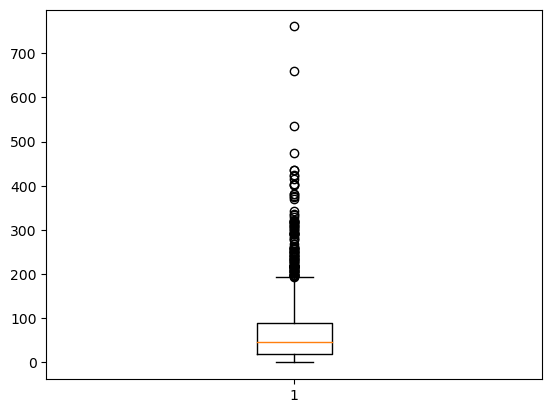

In [13]:
plt.boxplot(df["Gross"])
plt.show()

In [14]:
# first quartile & third quartile
q1 = df["Gross"].quantile(0.25)
q3 = df["Gross"].quantile(0.75)

In [15]:
iqr = q3 - q1
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)

Q1: 18.615000000000002
Q3: 88.44500000000001
IQR: 69.83000000000001


In [16]:
# calculate upper & lower limits to specifiy the outliers
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

Upper limit: 193.19000000000003
Lower limit: -86.13000000000002


In [17]:
# Any value greater than the upper_limit or less than the lower limit is outlier
df.loc[(df["Gross"] > upper_limit) | (df["Gross"] < lower_limit)]
# From the data below we can notice that we have 111 rows with outliers

Movie Name  Release Year  Duration  \
32                                         Star Wars          1977       121   
33    Star Wars: Episode V - The Empire Strikes Back          1980       124   
50                                              Jaws          1975       124   
52                                      The Exorcist          1973       122   
73                           Raiders of the Lost Ark          1981       115   
...                                              ...           ...       ...   
1854                             Alice in Wonderland          2010       108   
1870                     The Twilight Saga: New Moon          2009       130   
1871                      The Twilight Saga: Eclipse          2010       124   
1963                             Monsters vs. Aliens          2009        94   
1975         Alvin and the Chipmunks: The Squeakquel          2009        88   

      IMDB Rating  Metascore      Votes                         Genre  \
32            8.6       90.0  1444539.0    Action, Adventure, Fantasy   
33            8.7       82.0  1374400.0    Action, Adventure, Fantasy   
50            8.1       87.0   656761.0  Adventure, Mystery, Thriller   
52            8.1       83.0   452972.0                        Horror   
73            8.4       86.0  1033883.0             Action, Adventure   
...           ...        ...        ...                           ...   
1854          6.4       53.0   439658.0    Adventure, Family, Fantasy   
1870          4.8       44.0   299214.0     Adventure, Drama, Fantasy   
1871          5.1       58.0   260006.0      Action, Adventure, Drama   
1963          6.4       56.0   175456.0  Animation, Action, Adventure   
1975          4.5       41.0    54236.0     Adventure, Comedy, Family   

              Director             Cast   Gross  
32        George Lucas      Mark Hamill  322.74  
33      Irvin Kershner      Mark Hamill  290.48  
50    Steven Spielberg     Roy Scheider  260.00  
52    William Friedkin    Ellen Burstyn  232.91  
73    Steven Spielberg    Harrison Ford  248.16  
...                ...              ...     ...  
1854        Tim Burton   Mia Wasikowska  334.19  
1870       Chris Weitz  Kristen Stewart  296.62  
1871       David Slade  Kristen Stewart  300.53  
1963     Rob Letterman    Conrad Vernon  198.35  
1975      Betty Thomas        Jason Lee  219.61  

[111 rows x 10 columns]

In [18]:
# define new dataframe without the outliers
# Any value less than the upper_limit and greater than the lower limit is not outlier
new_df = df.loc[(df["Gross"] < upper_limit) & (df["Gross"] > lower_limit)]
print("before removing outliers:", len(df))
print("after removing outliers:", len(new_df))
print("Number of outliers:", len(df) - len(new_df))

before removing outliers: 1870
after removing outliers: 1759
Number of outliers: 111


In [19]:
new_df = df.copy()
new_df.loc[(new_df["Gross"] > upper_limit), "Gross"] = upper_limit
new_df.loc[(new_df["Gross"] < lower_limit), "Gross"] = lower_limit

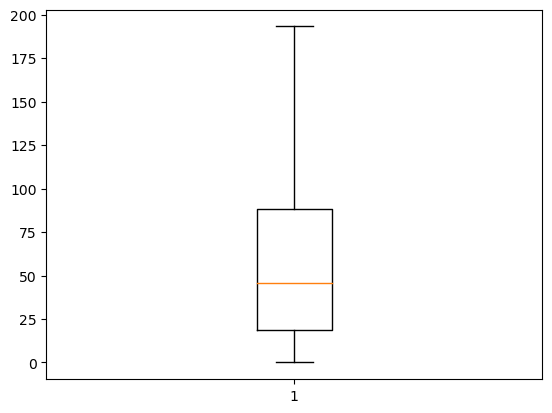

In [20]:
plt.boxplot(new_df["Gross"])
plt.show()

<h1><mark>Some visualizations and insights</mark></h1>

<h1><mark>plot function for top 10</mark></h1>

In [21]:
# This function show the top 10 movies acording to a parameter named column
# If we don't send a data frame as a second parameter the default is df 
def top_10_movies(column, df = df):
    data = df.sort_values(by = column, ascending = False, ignore_index = True)
    data = data[["Movie Name", column]].head(10)
    plt.figure(figsize=(9, 5))
    sns.barplot(data = data, x = column, y = "Movie Name", palette = "viridis")
    plt.title(f"Top 10 Movies By {column}")
    plt.tight_layout()
    plt.show()

In [22]:
# This function show the top 10 categories acording to a parameter named column
# Like the method above if we don't send a data frame as a second parameter the default is df 
def top_10_by_category(column, df = df):
    data = df.groupby(column)["Gross"].sum()
    data = data.nlargest(10)
    plt.figure(figsize=(9, 5))
    sns.barplot(x = data.values, y = data.index, palette="viridis")
    plt.title(f"Top 10 {column} By Gross")
    plt.xlabel("Total Gross")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

<h2><mark>Finding top 10 movies (except unusual values of Gross) acording to the Gross </mark></h2>

In [23]:
top_ten = new_df.groupby(new_df["Movie Name"])["Gross"].sum().sort_values(ascending=False)

In [24]:
top_ten.head(10)

Movie Name
The Karate Kid                               267.41
Planet of the Apes                           213.41
Clash of the Titans                          204.30
King Kong                                    203.19
Ocean's Eleven                               195.74
Alice in Wonderland                          194.26
Star Wars: Episode I - The Phantom Menace    193.19
Hancock                                      193.19
Austin Powers: The Spy Who Shagged Me        193.19
Avatar                                       193.19
Name: Gross, dtype: float64

<h2><mark>Finding top 10 movies for all time acording to the Gross </mark></h2>

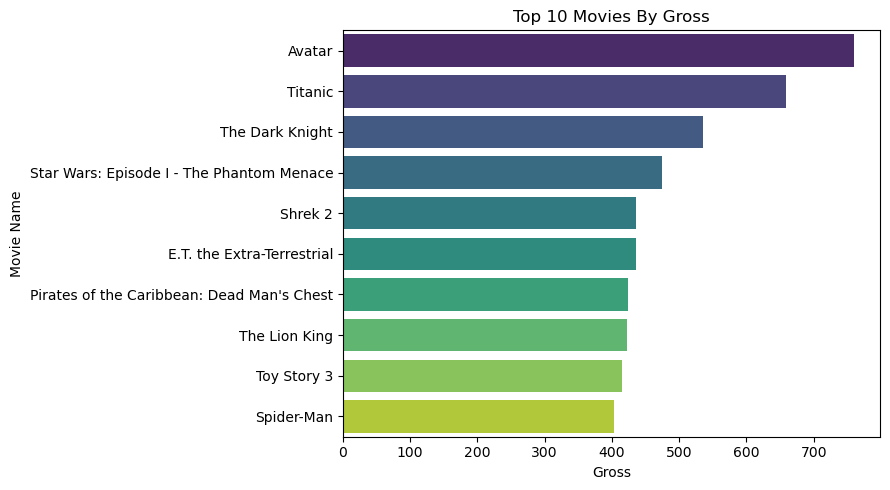

Movie Name
Avatar                                        760.51
Titanic                                       659.33
The Dark Knight                               534.86
Star Wars: Episode I - The Phantom Menace     474.54
Shrek 2                                       436.47
E.T. the Extra-Terrestrial                    435.11
Pirates of the Caribbean: Dead Man's Chest    423.32
The Lion King                                 422.78
Toy Story 3                                   415.00
Spider-Man                                    403.71
Name: Gross, dtype: float64

In [25]:
top_ten_all_time = df.groupby(df["Movie Name"])["Gross"].sum().sort_values(ascending=False)
top_10_movies("Gross")
top_ten_all_time.head(10)

<h2><mark>Finding top 10 movies for all time acording to the rate </mark></h2>

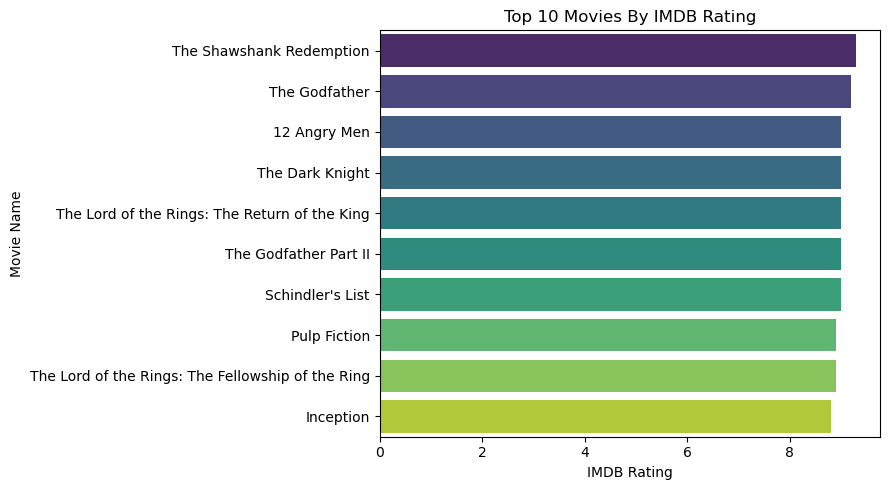

In [26]:
top_10_movies("IMDB Rating")

<h2><mark>Finding top 10 movies for all time acording to the Metascore </mark></h2>

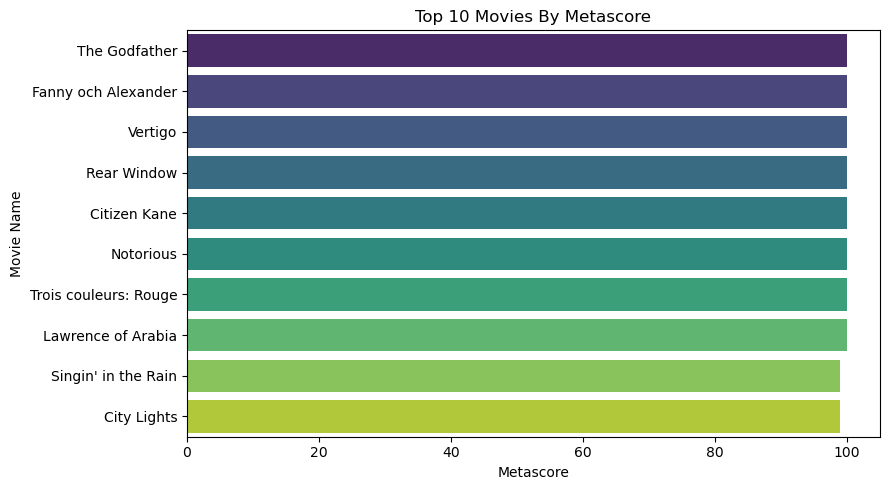

In [27]:
top_10_movies("Metascore")

<h2><mark>Finding top 10 movies for all time acording to the Votes </mark></h2>

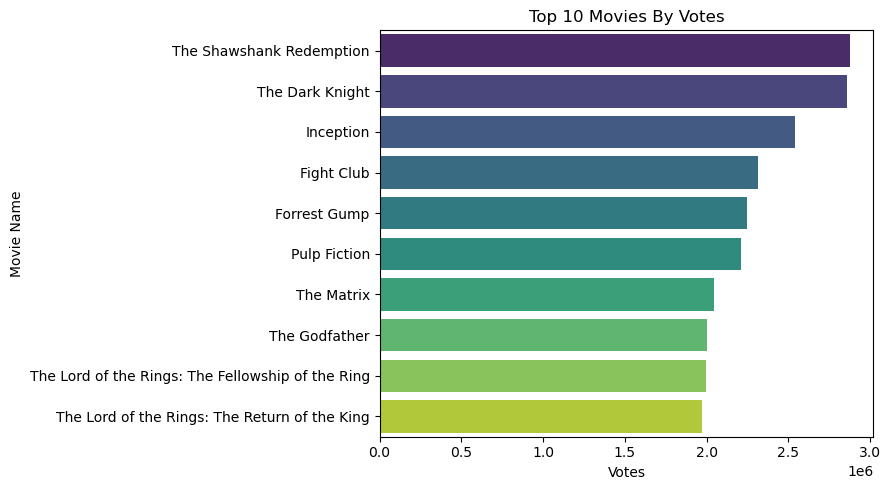

Movie Name
The Shawshank Redemption                             2875249.0
The Dark Knight                                      2857781.0
Inception                                            2538581.0
Fight Club                                           2311174.0
Forrest Gump                                         2245598.0
Pulp Fiction                                         2209021.0
The Matrix                                           2043258.0
The Godfather                                        2002655.0
The Lord of the Rings: The Fellowship of the Ring    1998243.0
The Lord of the Rings: The Return of the King        1970311.0
Name: Votes, dtype: float64

In [28]:
top_ten_Votes = df.groupby(df["Movie Name"])["Votes"].sum().sort_values(ascending=False)
top_10_movies("Votes")
top_ten_Votes.head(10)

<h2><mark>longest 10 movies</mark></h2>

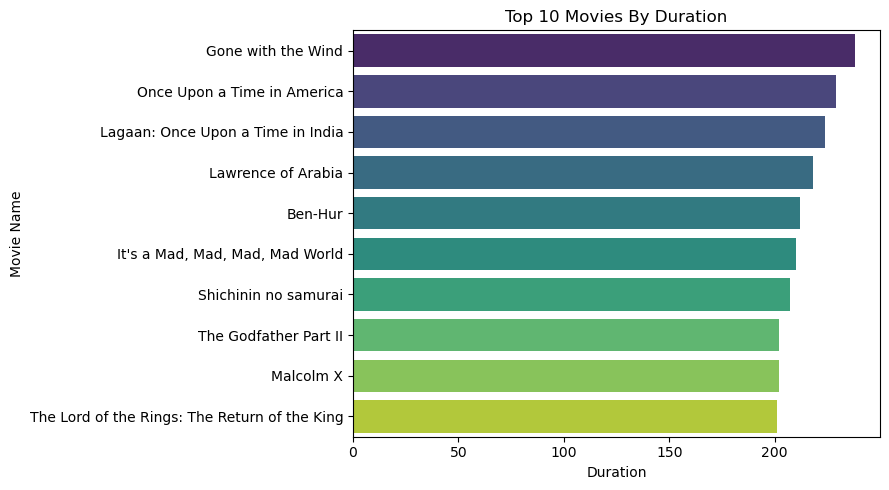

In [29]:
top_10_movies("Duration")

<h2><mark>Finding top 10 Genre, Director and Cast</mark></h2>

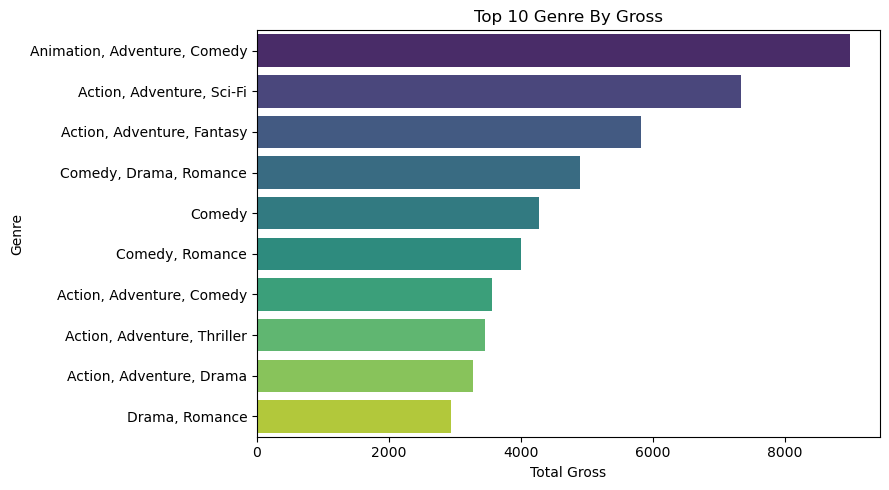

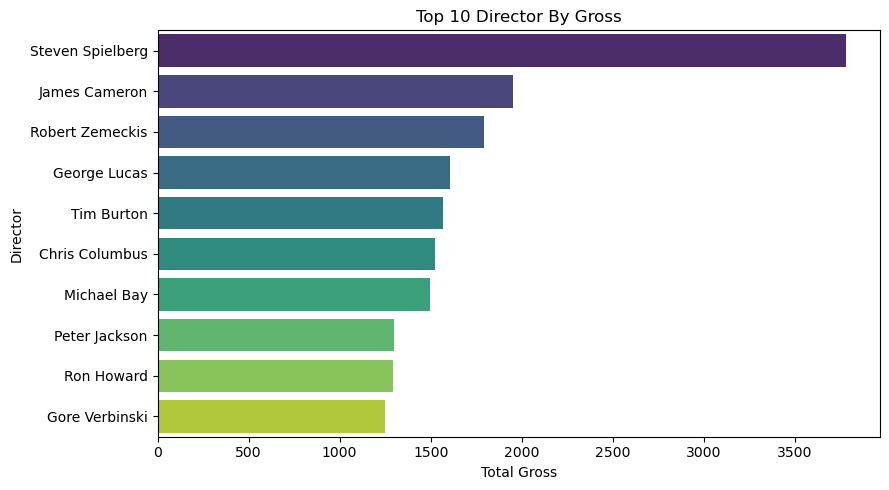

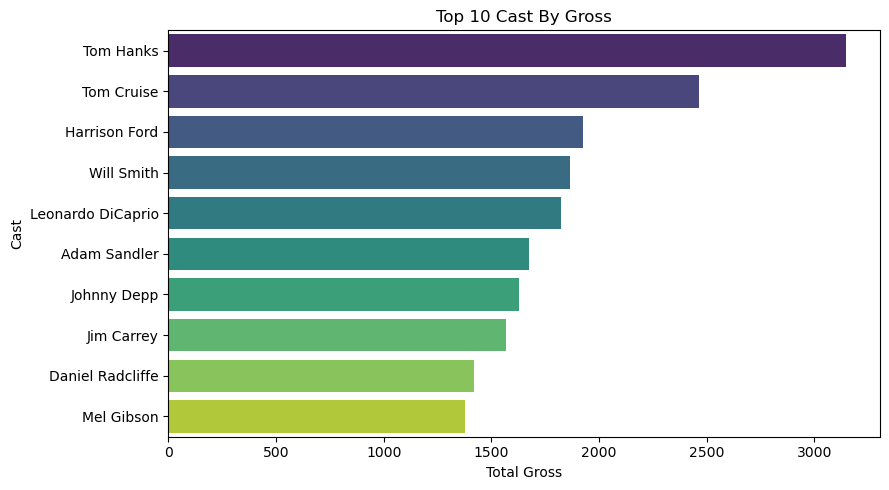

In [30]:
top_10_by_category("Genre")
top_10_by_category("Director")
top_10_by_category("Cast")

<h2><mark>Calculate number of movies released each year</mark></h2>

In [31]:
movies_per_year = df['Release Year'].value_counts().sort_index().reset_index()
movies_per_year.columns = ['Release Year', 'Number of Movies']

# Create an interactive line plot with Plotly
fig = px.line(movies_per_year, x='Release Year', y='Number of Movies', title='Number of Movies Released Each Year',
              labels={'Number of Movies': 'Number of Movies', 'Release Year': 'Release Year'},
              hover_data={'Number of Movies': True, 'Release Year': True},
              line_shape='linear',  
              render_mode='svg',    
              markers=True,
              color_discrete_sequence=['crimson'],
              width=1100, height=500) 

# Show the plot
fig.show()

# From the following graph we can conclude that:-
# The number of movies has increased recently, especially in the year 2003 to 2009
# Back to a combination of industry growth, technological advancements, changing consumer preferences..

<h2><mark>Calculate gross earnings statistics per year</mark></h2>

In [32]:
gross_yearly = df.groupby('Release Year')['Gross'].agg(['min', 'max', 'mean']).reset_index()

# Create figure
fig = go.Figure()

# Add shaded area between min and max earnings
fig.add_trace(go.Scatter(x=gross_yearly['Release Year'], y=gross_yearly['min'],
                         fill='tonexty', mode='none', fillcolor='rgba(147, 112, 219, 0.4)',
                         line=dict(color='darkmagenta'), 
                         name='Min Gross'))

fig.add_trace(go.Scatter(x=gross_yearly['Release Year'], y=gross_yearly['max'],
                         fill='tonexty', mode='none', fillcolor='rgba(173, 216, 230, 0.43)',
                         line=dict(color='lightblue'),
                         name='Max Gross'))

# Add line plot for mean earnings
fig.add_trace(go.Scatter(x=gross_yearly['Release Year'], y=gross_yearly['mean'],
                         mode='lines+markers', name='Mean Gross',
                         line=dict(color='royalblue', width=2)))

# Update layout
fig.update_layout(title='Gross Earnings Over Time',
                  xaxis_title='Release Year',
                  yaxis_title='Gross Earnings',
                  hovermode='x unified',
                  plot_bgcolor='rgba(0,0,0,0)',
                  legend=dict(x=0.02, y=0.98),
                  template='plotly_white',
                  width=1100, height=500)

# Show plot
fig.show()

# As we can see in the graph below:-
# 1937, the average (mean) earnings from movies were higher compared to other years
# Movies were making more and more money each year

<h2><mark>Create a hover text</mark></h2>

In [33]:
hover_text = [f'Duration: {d} min<br>Metascore: {m}<br>IMDb Rating: {r}' 
              for d, m, r in zip(df['Duration'], df['Metascore'], df['IMDB Rating'])]

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df['Duration'],
    y=df['IMDB Rating'],
    z=df['Metascore'],
    mode='markers',
    marker=dict(
        size=8,
        color=df['Metascore'],  # Color points based on Metascore
        colorscale='Plasma',  # Specify color scale
        opacity=0.8
    ),
    hovertext=hover_text,  # Set hover text
    hoverinfo='text'  # Show hover text
)])

# Update layout
fig.update_layout(scene=dict(
    xaxis_title='Duration (minutes)',
    yaxis_title='IMDb Rating',
    zaxis_title='Metascore'
),
    width=800, 
    height=800  
)

# Show plot
fig.show()

# This plot highlights how movies with different durations can still achieve critical and audience praise

<h2><mark>Distribution of IMDB Ratings by Genre</mark></h2>

In [34]:
# Split genres and create a new DataFrame with each genre in a separate row
genre_df = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')

# Group by genre and calculate summary statistics for IMDb ratings
genre_summary = genre_df.groupby('Genre')['IMDB Rating'].describe().reset_index()

# Plotting
fig = px.box(genre_df, x='IMDB Rating', y='Genre', color='Genre', 
             labels={'IMDB Rating': 'IMDb Rating', 'Genre': 'Genre'}, 
             title='IMDb Ratings Summary by Genre')

# Add red points for the mean of each box
for i, genre in enumerate(genre_summary['Genre']):
    mean_rating = genre_summary.loc[i, 'mean']
    fig.add_scatter(x=[mean_rating], y=[genre], mode='markers', marker=dict(color='red', size=10),
                    name='Mean')

# Update layout
fig.update_layout(width=1100, height=850)
fig.show()


<h2><mark>Find the genre with the lowest and highest rating</mark></h2>

In [35]:
# Find the genre with the lowest mean rating
min_mean_genre = genre_summary.loc[genre_summary['mean'].idxmin(), 'Genre']

# Find the genre with the highest mean rating
max_mean_genre = genre_summary.loc[genre_summary['mean'].idxmax(), 'Genre']

print("Genre with the lowest mean rating:", min_mean_genre)
print("Genre with the highest mean rating:", max_mean_genre)

# Film-Noir has the hightest mean of rating , the lowest one is horror

Genre with the lowest mean rating: Horror
Genre with the highest mean rating: Film-Noir


<h2><mark>Gross Earnings of Movies Categorized under Film-Noir</mark></h2>

In [36]:
# Filter the dataframe for movies categorized under Film-Noir genre
Film_Noir_movies = df[df['Genre'].str.contains('Film-Noir', na=False)]

# Sort the movies by gross earnings
Film_Noir_movies_sorted = Film_Noir_movies.sort_values(by='Gross', ascending=False)

# Create a bar plot
fig = px.bar(Film_Noir_movies_sorted, x='Movie Name', y='Gross', color='Movie Name',
             title='Gross Earnings of Movies Categorized under Film-Noir',
             labels={'Gross': 'Gross Earnings', 'Movie Name': 'Movie Name'},
             hover_data={'IMDB Rating': True}) 

# Update layout
fig.update_layout(xaxis_title=None, yaxis_title='Gross Earnings',width=800, height=500)

# Show plot
fig.show()

# Films categorized under Film-Noir may have higher average ratings, their gross earnings might not necessarily reflect this

<h2><mark>Gross Earnings of Movies Categorized under Horror</mark></h2>

In [37]:
# Filter the dataframe for movies categorized under Horror genre
Horror_movies = df[df['Genre'].str.contains('Horror', na=False)]

# Sort the movies by gross earnings
Horror_movies_sorted = Horror_movies.sort_values(by='Gross', ascending=False)

# Create a bar plot
fig = px.bar(Horror_movies_sorted, x='Movie Name', y='Gross',color='Movie Name',
             title='Gross Earnings of Movies Categorized under Horror',
             labels={'Gross': 'Gross Earnings', 'Movie Name': 'Movie Name'},
             hover_data={'IMDB Rating': True})  # Include IMDb rating in hover data

# Update layout
fig.update_layout(xaxis_title=None, yaxis_title='Gross Earnings',width=1250, height=850)

# Show plot
fig.show()

# Films under the Horror genre seem to generate higher profits despite potentially lower average ratings

<h2><mark>Word Cloud plot</mark></h2>

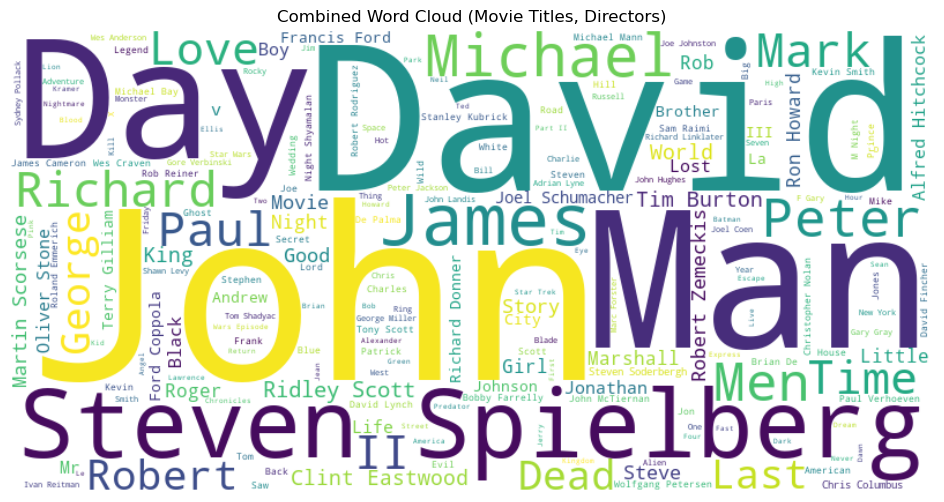

In [38]:
combined_text = ' '.join(df['Movie Name']) + ' ' + ' '.join(df['Director'])
wordcloud_combined = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
plt.figure(figsize=(18, 6))
plt.imshow(wordcloud_combined, interpolation='bilinear')
plt.title('Combined Word Cloud (Movie Titles, Directors)')
plt.axis('off')
plt.show()

# Larger and bolder words indicate higher frequency or prominence.

<h1><mark>Now we will apply some methods to our data set</mark></h1>

<h1><mark>1) Hierarchical Clustering</mark></h1>

### *- perform the hierarchical clustering on the columns of interest*
### *- use ward linkage clustering and visualize the dendrograms*

<h2>1. Gross Feature Dendrogram</h2>

In [39]:
# Financial Performance
x1 = df[['Gross']]

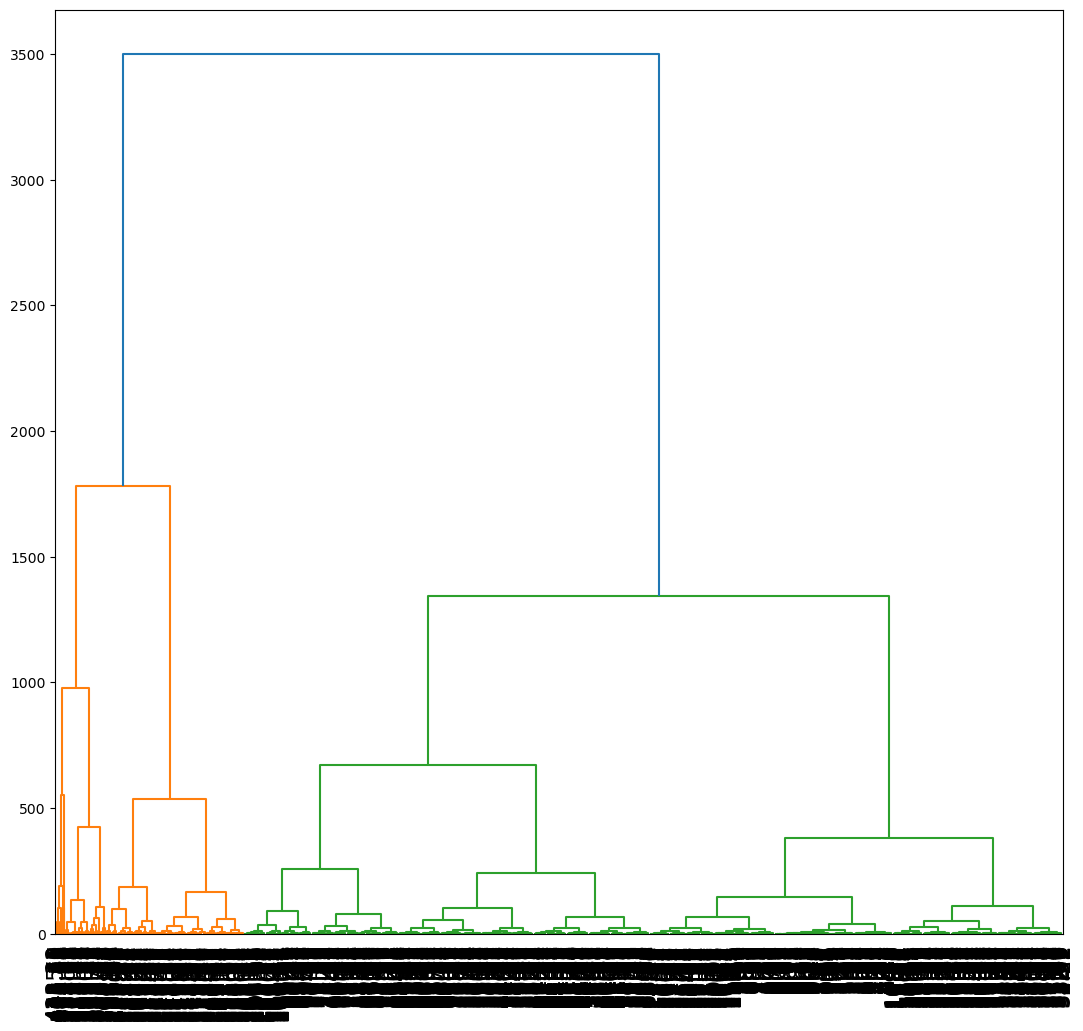

In [40]:
Z = linkage(x1, method='ward', metric='euclidean')

labelList = list(df['Gross'])
plt.figure(figsize=(13, 12))
dendrogram(
Z,
orientation='top',
labels=labelList,
distance_sort='descending',
leaf_font_size=16)
plt.show()

# From the following dendrogram we can conclude that :- 
# The clusters at the bottom represent movies with distinct low levels of financial success
# The separation between major clusters shows a clear distinction between movies with high and low gross performance
# The blue line indicates an outlier movie with significantly higher gross performance compared to the rest

In [41]:
hierarchical_model1 = AgglomerativeClustering(n_clusters=3)
hierarchical_labels1 = hierarchical_model1.fit_predict(x1)
hierarchical_silhouette_score1 = silhouette_score(x1, hierarchical_labels1)
print("Hierarchical Silhouette Score:", hierarchical_silhouette_score1)

Hierarchical Silhouette Score: 0.6226630385737687


<h2>2. IMDB Rating Dendrogram</h2>

In [42]:
# High and low IMDB Rating movies
x2 = df[['IMDB Rating']] 

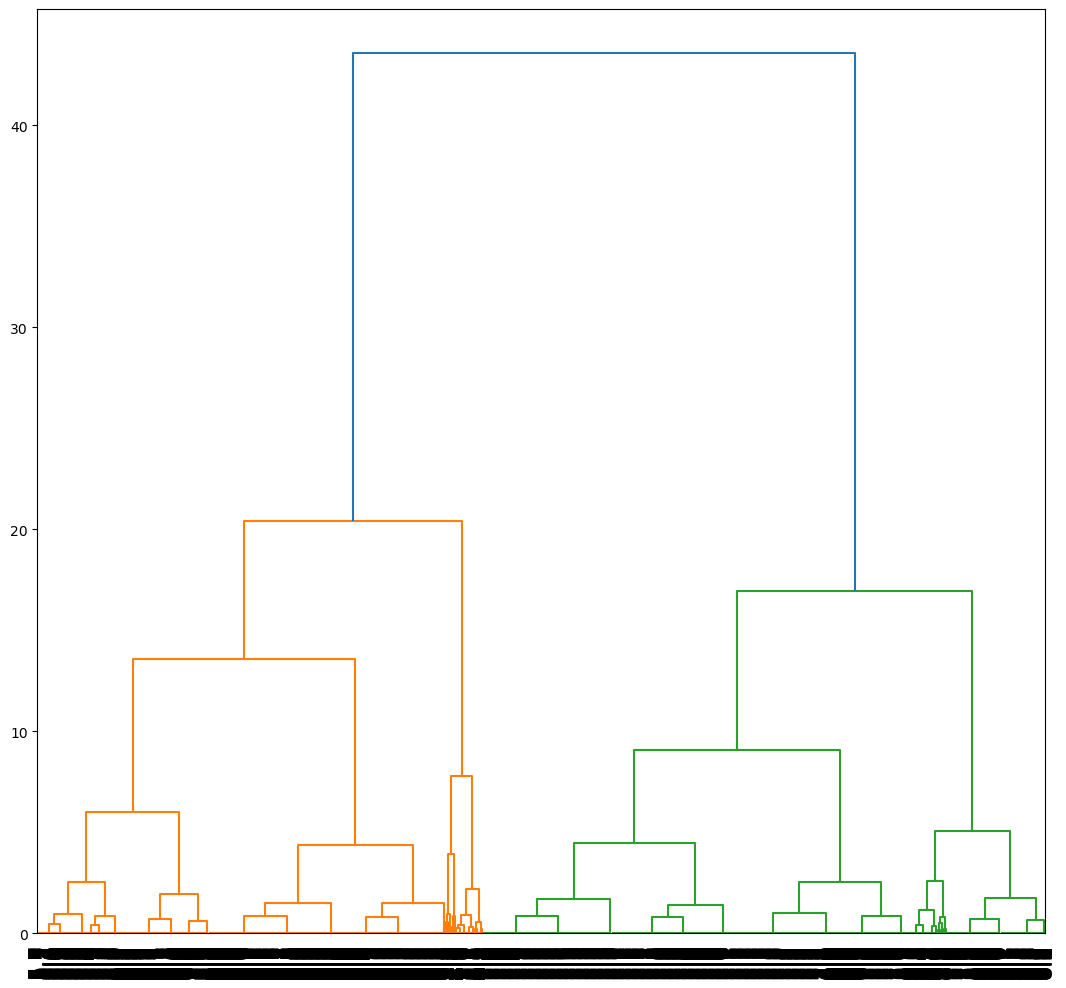

In [43]:
Z = linkage(x2, method='ward', metric='euclidean')

labelList = list(df['IMDB Rating'])
plt.figure(figsize=(13, 12))
dendrogram(
Z,
orientation='top',
labels=labelList,
distance_sort='descending',
leaf_font_size=16)
plt.show()

# The tall lines in the graph represent movies with exceptionally high IMDB ratings

In [44]:
hierarchical_model2 = AgglomerativeClustering(n_clusters=3)
hierarchical_labels2 = hierarchical_model2.fit_predict(x2)
hierarchical_silhouette_score2 = silhouette_score(x2, hierarchical_labels2)
print("Hierarchical Silhouette Score:", hierarchical_silhouette_score2)

Hierarchical Silhouette Score: 0.5544017901633311


<h2>3. Metascore Dendrogram</h2>

In [45]:
# High and low metascore movies
x3 = df[['Metascore']]

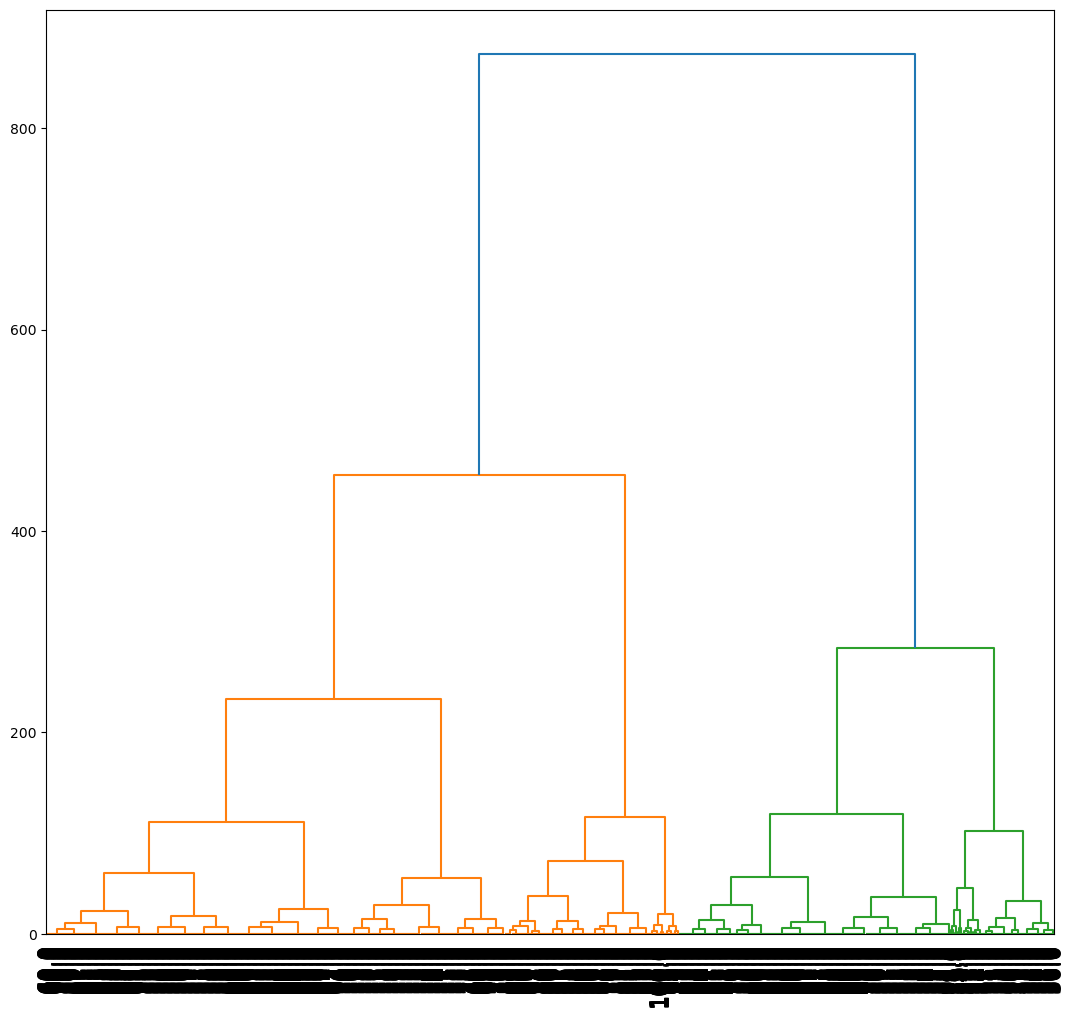

In [46]:
Z = linkage(x3, method='ward', metric='euclidean')

labelList = list(df['Metascore'])
plt.figure(figsize=(13, 12))
dendrogram(
Z,
orientation='top',
labels=labelList,
distance_sort='descending',
leaf_font_size=16)
plt.show()

# The lone blue line represents a movie with an outstanding Metascore, potentially a critically acclaimed masterpiece

In [47]:
hierarchical_model3 = AgglomerativeClustering(n_clusters=3)
hierarchical_labels3 = hierarchical_model3.fit_predict(x3)
hierarchical_silhouette_score3 = silhouette_score(x3, hierarchical_labels3)
print("Hierarchical Silhouette Score:", hierarchical_silhouette_score3)

Hierarchical Silhouette Score: 0.5379528899743491


<h2>4. Votes Dendrogram</h2>

In [48]:
# High and low rating movies
x4 = df[['Votes']] 

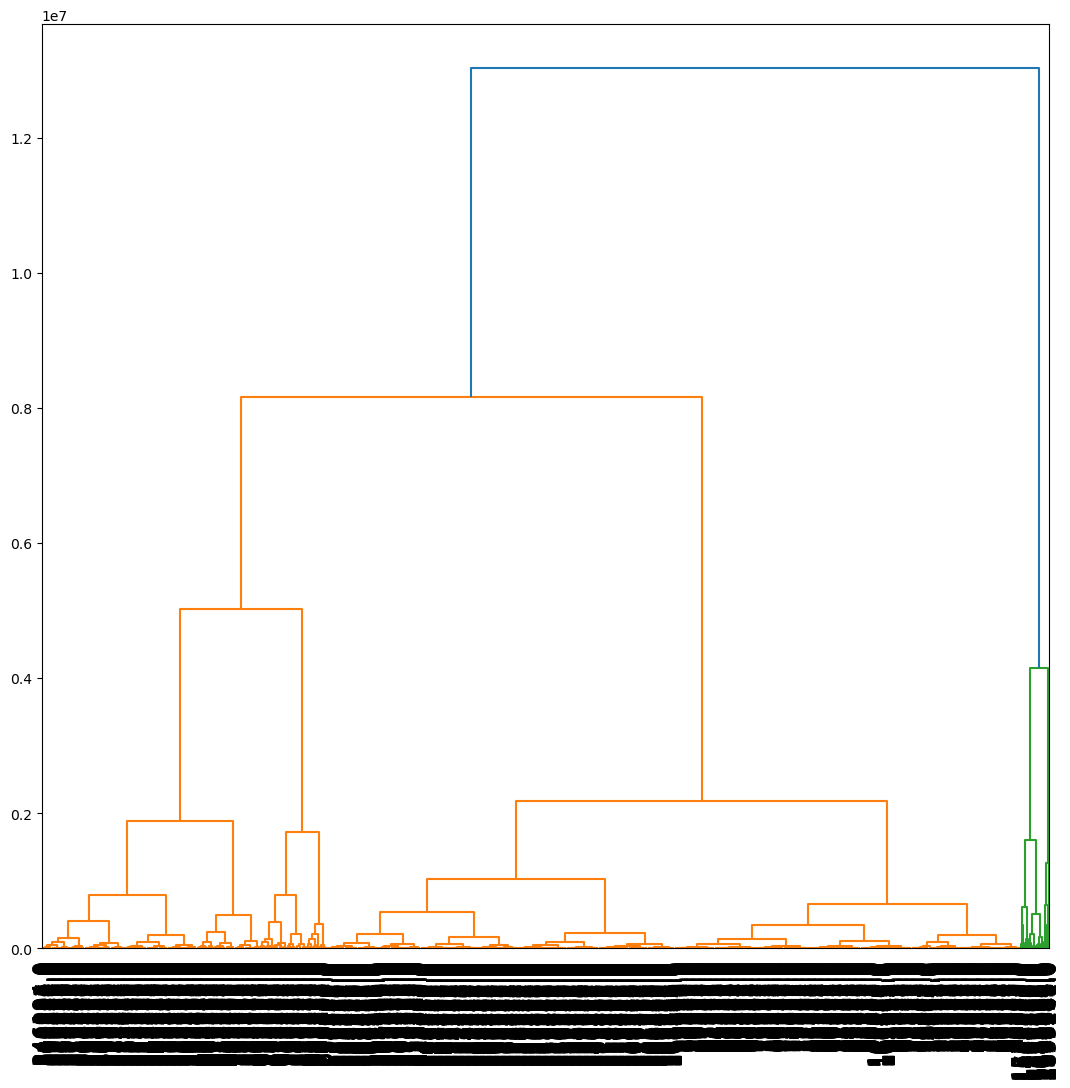

In [49]:

Z = linkage(x4, method='ward', metric='euclidean')

labelList = list(df['Votes'])
plt.figure(figsize=(13, 12))
dendrogram(
Z,
orientation='top',
labels=labelList,
distance_sort='descending',
leaf_font_size=16)
plt.show()

# The dense clustering at the bottom indicates a wide range of audience engagement levels
# The blue line represents a movie that have won the appealing of the audience

In [50]:
hierarchical_model4 = AgglomerativeClustering(n_clusters=3)
hierarchical_labels4 = hierarchical_model4.fit_predict(x4)
hierarchical_silhouette_score4 = silhouette_score(x4, hierarchical_labels4)
print("Hierarchical Silhouette Score:", hierarchical_silhouette_score4)

Hierarchical Silhouette Score: 0.6308324487765908


<h2>5. IMDB Rating, Votes, Metascore Dendrogram</h2>

In [51]:
# Rating and Popularity
x5 = df[['IMDB Rating','Votes','Metascore']]

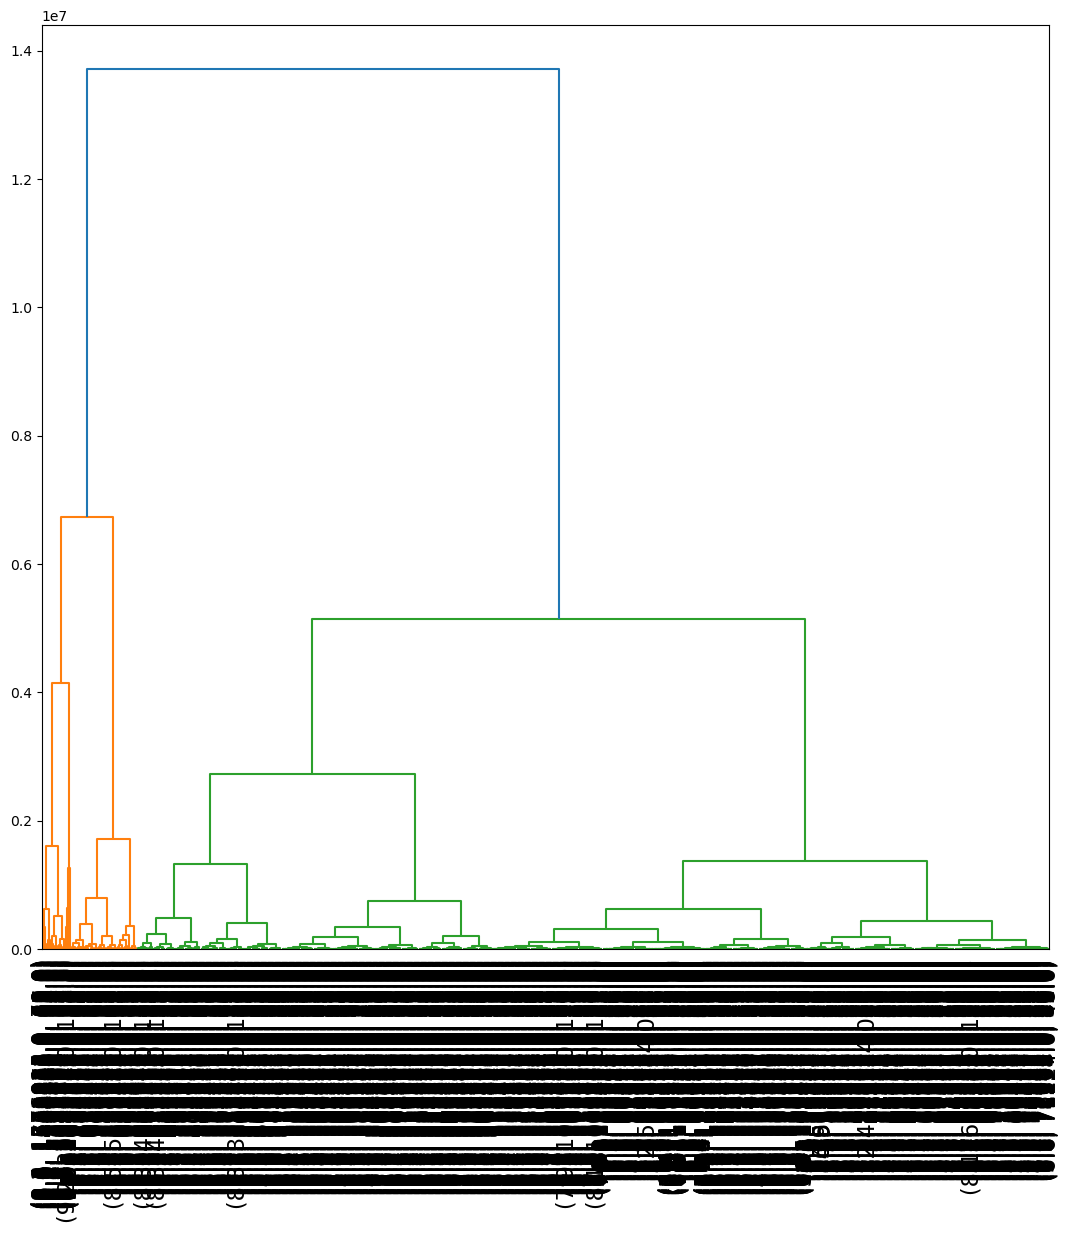

In [52]:
Z = linkage(x5, method='ward', metric='euclidean')

labelList = list(zip(df['IMDB Rating'], df['Votes'], df['Metascore']))
plt.figure(figsize=(13, 12))
dendrogram(
Z,
orientation='top',
labels=labelList,
distance_sort='descending',
leaf_font_size=16)
plt.show()

# Clusters formed at higher levels group movies based on their overall reception, considering ratings, votes, and Metascore

In [53]:
hierarchical_model5 = AgglomerativeClustering(n_clusters=3)
hierarchical_labels5 = hierarchical_model5.fit_predict(x5)
hierarchical_silhouette_score5 = silhouette_score(x5, hierarchical_labels5)
print("Hierarchical Silhouette Score:", hierarchical_silhouette_score5)

Hierarchical Silhouette Score: 0.7252001152065424


<h2>6. Gross, IMDB Rating Dendrogram</h2>

In [54]:
#Financial success and IMDB Rating
x6 = df[['Gross','IMDB Rating']]

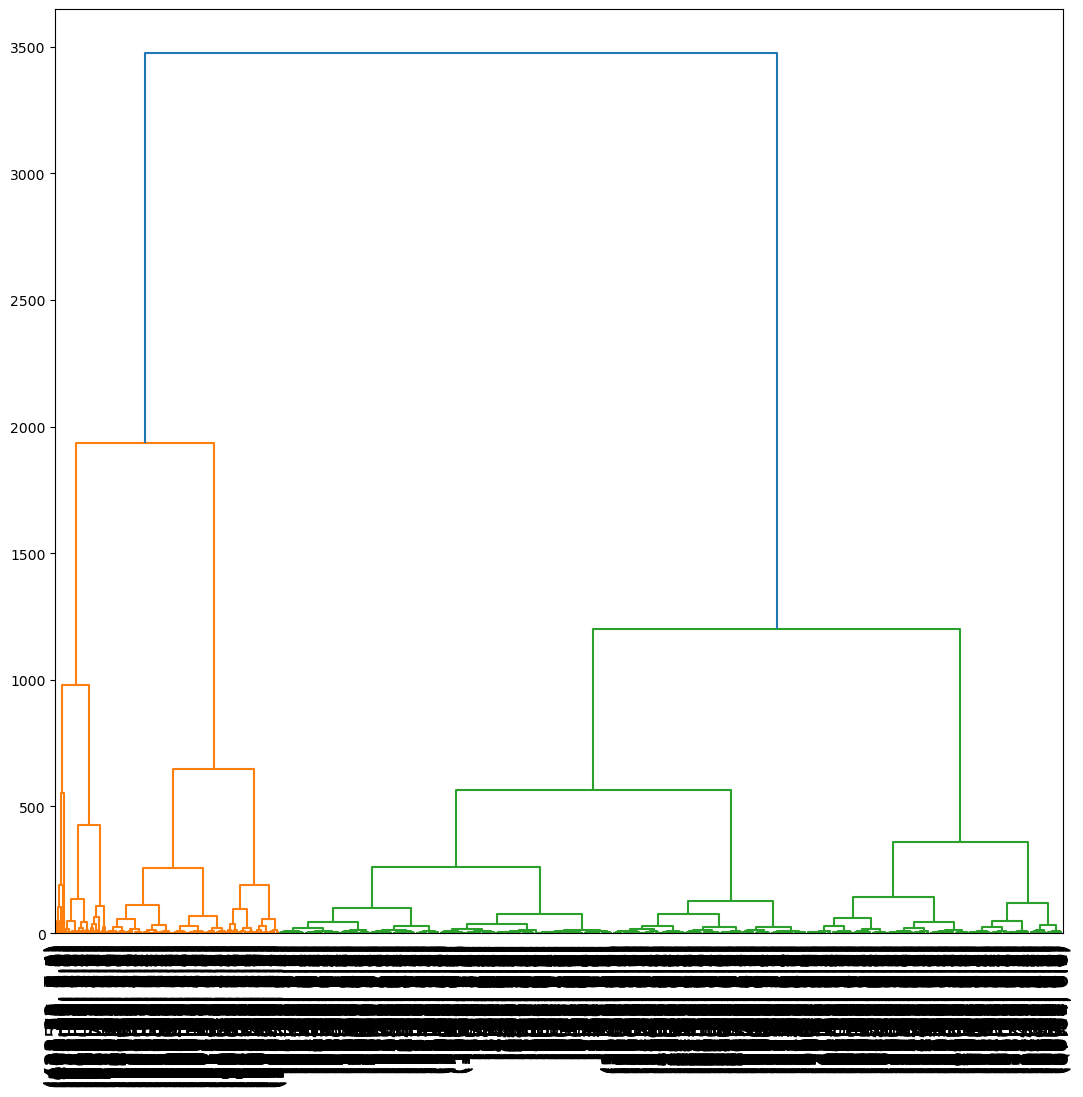

In [55]:
Z = linkage(x6, method='ward', metric='euclidean')

labelList = list(zip(df['Gross'], df['IMDB Rating']))
plt.figure(figsize=(13, 12))
dendrogram(
Z,
orientation='top',
labels=labelList,
distance_sort='descending',
leaf_font_size=16)
plt.show()

# Clusters formed based on a movie's financial success and critical acclaim (IMDB Rating) show the intersection of commerce and art in the movie industry.

In [56]:
hierarchical_model6 = AgglomerativeClustering(n_clusters=3)
hierarchical_labels6 = hierarchical_model6.fit_predict(x6)
hierarchical_silhouette_score6 = silhouette_score(x6, hierarchical_labels6)
print("Hierarchical Silhouette Score:", hierarchical_silhouette_score6)

Hierarchical Silhouette Score: 0.6348648680899047


<h2>7. Gross, Votes Dendrogram</h2>

In [57]:
#Financial success and audience reception
x7 = df[['Gross','Votes']] 

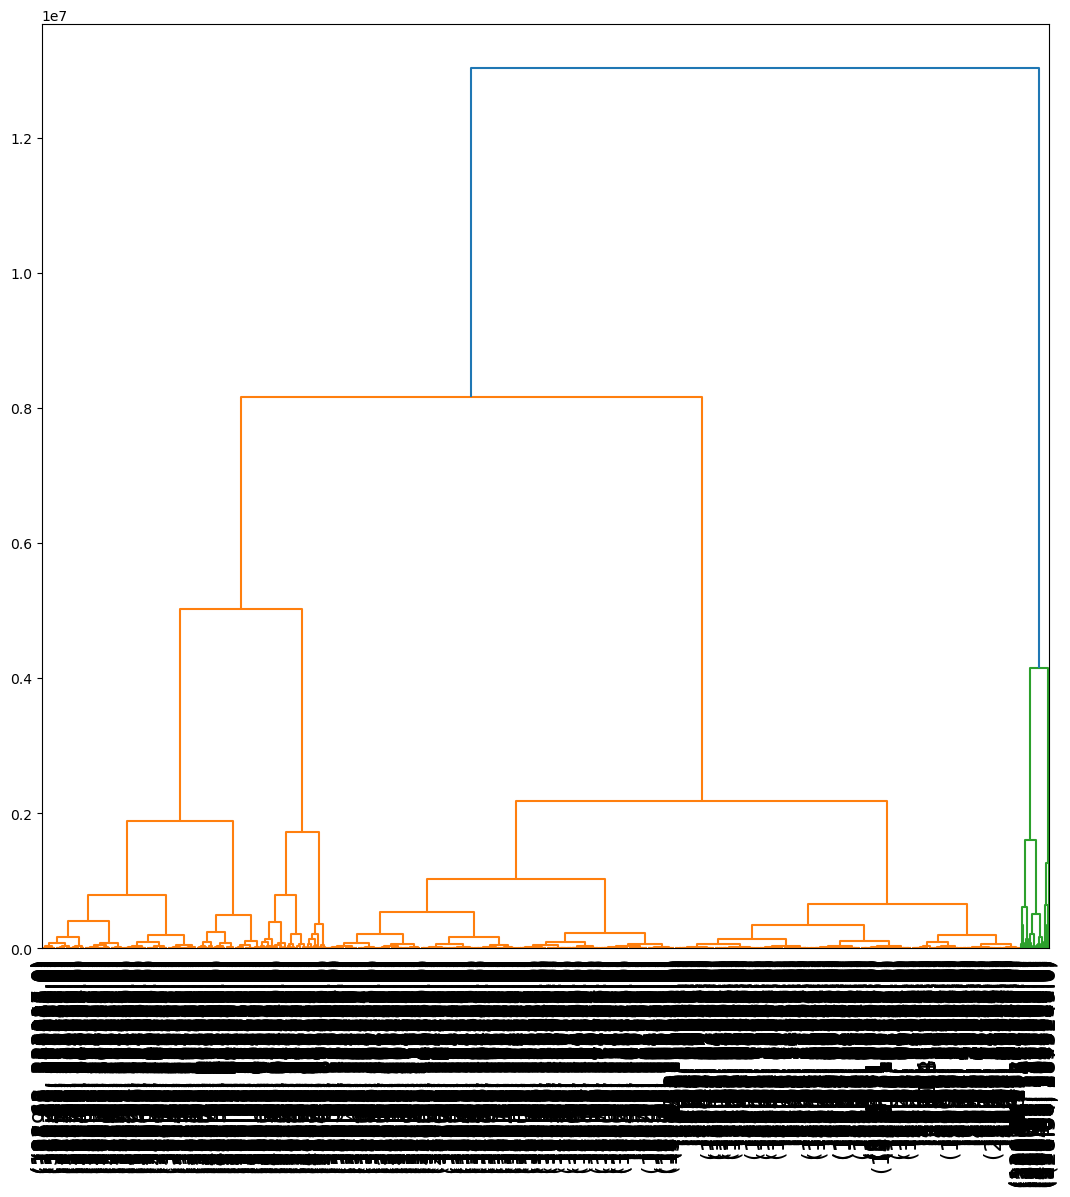

In [58]:
Z = linkage(x7, method='ward', metric='euclidean')

labelList = list(zip(df['Gross'], df['Votes']))
plt.figure(figsize=(13, 12))
dendrogram(
Z,
orientation='top',
labels=labelList,
distance_sort='descending',
leaf_font_size=16)
plt.show()

# Clusters based on audience reception and financial success shows the balance between pleasing crowds and making money
# The blue line shows where financial success and audience popularity intersect

In [59]:
hierarchical_model7 = AgglomerativeClustering(n_clusters=3)
hierarchical_labels7 = hierarchical_model7.fit_predict(x7)
hierarchical_silhouette_score7 = silhouette_score(x7, hierarchical_labels7)
print("Hierarchical Silhouette Score:", hierarchical_silhouette_score7)

Hierarchical Silhouette Score: 0.6308319499568671


<h2>8. IMDB Rating, Votes Dendrogram</h2>

In [60]:
# Critical acclaim and Popular appeal
x8 = df[['IMDB Rating','Votes']]

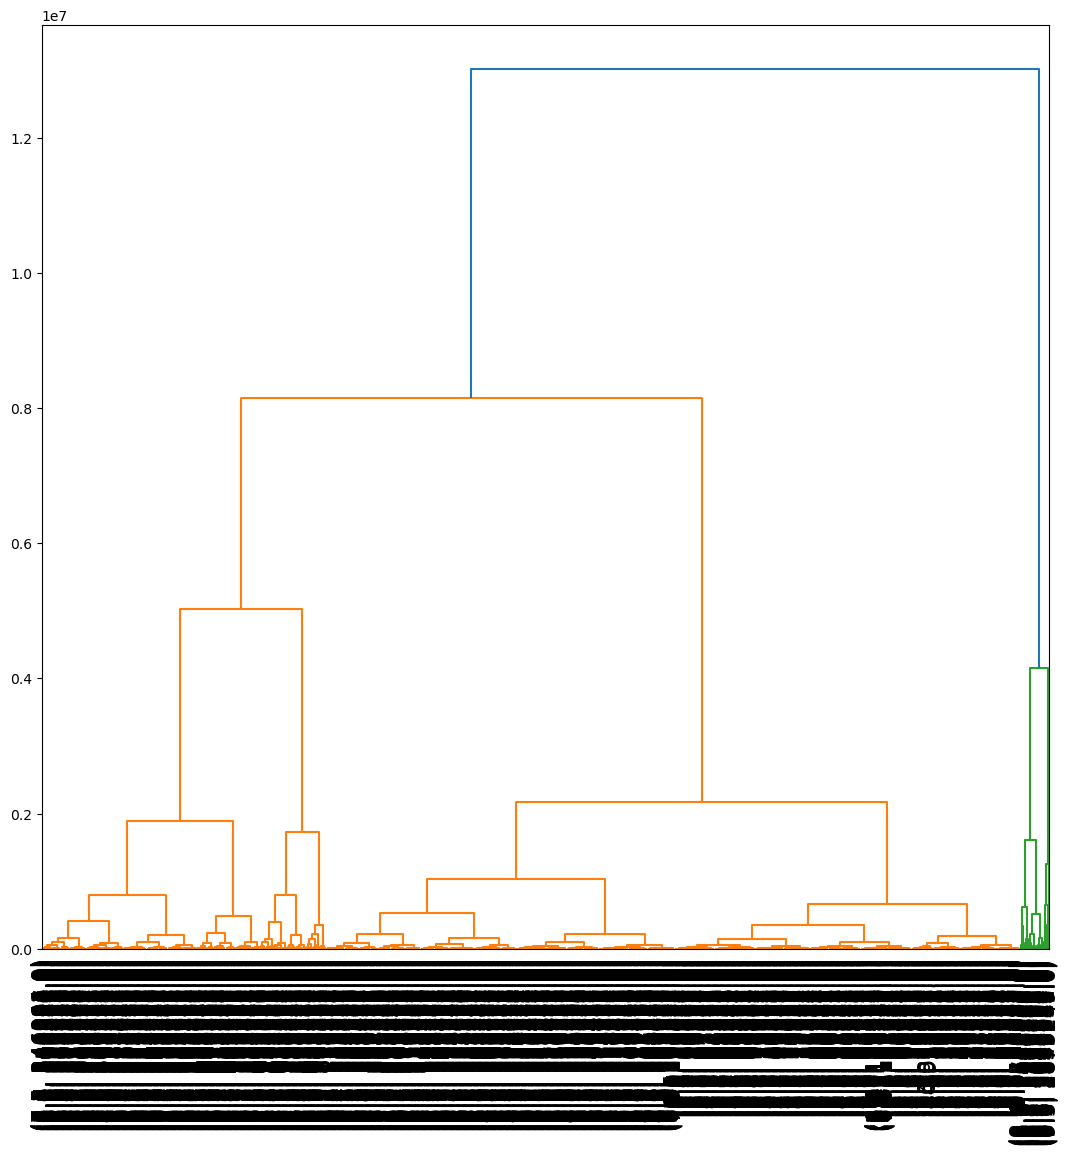

In [61]:
Z = linkage(x8, method='ward', metric='euclidean')

labelList = list(zip(df['IMDB Rating'], df['Votes'],))
plt.figure(figsize=(13, 12))
dendrogram(
Z,
orientation='top',
labels=labelList,
distance_sort='descending',
leaf_font_size=16)
plt.show()

# Clusters formed based on ratings and audience shows the dynamics between critical acclaim and public reception and appeal

In [62]:
hierarchical_model8 = AgglomerativeClustering(n_clusters=2)
hierarchical_labels8 = hierarchical_model8.fit_predict(x8)
hierarchical_silhouette_score8 = silhouette_score(x8, hierarchical_labels8)
print("Hierarchical Silhouette Score:", hierarchical_silhouette_score8)

Hierarchical Silhouette Score: 0.8415001272629455


<h2>9. Add the cluster labels for each row in the dataframe</h2>

In [63]:
df['Clusters'] = fcluster(Z,2) # 2 is the no. of clusters 
df

# Here we add a new column named 'Clusters' which indicate the cluster of each row in our data set
# As we notice from the output below all rows belong to the same cluster which is 1 
# That is because we use Agglomerative (bottom-up) approach which combines all the data points into the same cluster

Movie Name  Release Year  Duration  IMDB Rating  \
0                          The Godfather          1972       175          9.2   
1                  The Godfather Part II          1974       202          9.0   
2                        Ordinary People          1980       124          7.7   
3                     Lawrence of Arabia          1962       218          8.3   
5     Close Encounters of the Third Kind          1977       138          7.6   
...                                  ...           ...       ...          ...   
1995                  The Young Victoria          2009       105          7.2   
1996                         Tooth Fairy          2010       101          5.0   
1997                      The Informant!          2009       108          6.5   
1998                     Youth in Revolt          2009        90          6.4   
1999                          Quarantine          2008        89          6.0   

      Metascore      Votes                        Genre              Director  \
0         100.0  2002655.0                 Crime, Drama  Francis Ford Coppola   
1          90.0  1358608.0                 Crime, Drama  Francis Ford Coppola   
2          86.0    56476.0                        Drama        Robert Redford   
3         100.0   313044.0  Adventure, Biography, Drama            David Lean   
5          90.0   216050.0                Drama, Sci-Fi      Steven Spielberg   
...         ...        ...                          ...                   ...   
1995       64.0    66235.0    Biography, Drama, History      Jean-Marc Vallée   
1996       36.0    49527.0      Comedy, Family, Fantasy       Michael Lembeck   
1997       66.0    67318.0     Biography, Comedy, Crime     Steven Soderbergh   
1998       63.0    75956.0       Comedy, Drama, Romance         Miguel Arteta   
1999       53.0    77075.0     Horror, Sci-Fi, Thriller     John Erick Dowdle   

                    Cast   Gross  Clusters  
0          Marlon Brando  134.97         1  
1              Al Pacino   57.30         1  
2      Donald Sutherland   54.80         1  
3          Peter O'Toole   44.82         1  
5       Richard Dreyfuss  132.09         1  
...                  ...     ...       ...  
1995         Emily Blunt   11.00         1  
1996      Dwayne Johnson   60.02         1  
1997          Matt Damon   33.31         1  
1998        Michael Cera   15.28         1  
1999  Jennifer Carpenter   31.69         1  

[1870 rows x 11 columns]

# 10. Plotting Scatter Plots

In [64]:
def plot_hierarchical_clustering(df, columns, n_clusters=4, metric='euclidean', linkage='ward'):
   
    selected_data = df.loc[:, columns]
   
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(selected_data)
    
    hc = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage)
    clusters = hc.fit_predict(scaled_data)
    
    colors = ['cyan', 'yellow', 'red', 'purple']
    for cluster_num in range(n_clusters):
        plt.scatter(scaled_data[clusters == cluster_num, 0], scaled_data[clusters == cluster_num, 1], c=colors[cluster_num])
    
    plt.title(' vs '.join(columns))
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.show()

### IMDB Rating and Votes

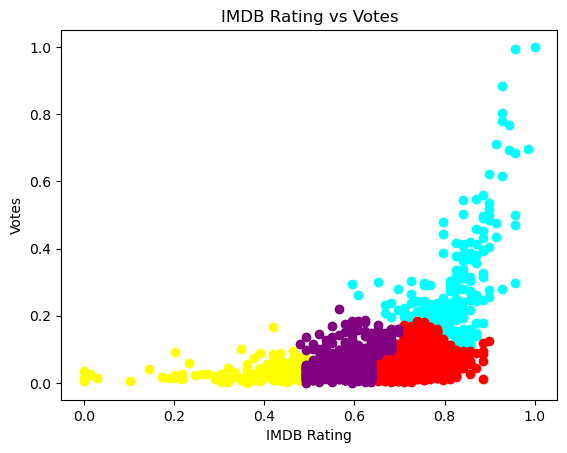

In [65]:
plot_hierarchical_clustering(df, ['IMDB Rating', 'Votes'])

#As IMDB ratings increase, the number of votes also tends to increase.
#Movies with higher IMDB ratings generally have a higher number of votes. 
#It shows that movies with low ratings and low vote counts are less common compared to movies with higher ratings and votes.

### IMDB Rating and Gross

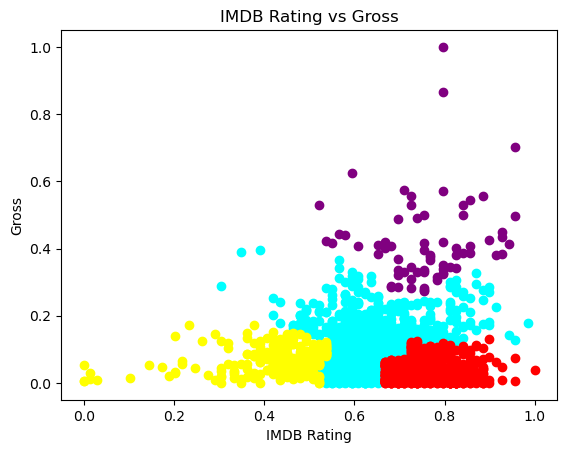

In [66]:
plot_hierarchical_clustering(df, ['IMDB Rating', 'Gross'])
#There is no clear correlation between IMDB ratings and the gross earnings of the movies.
#the IMDB ratings do not determine financial success.
#There is no strong relationship between IMDB ratings and the gross earnings.

### Gross and Votes

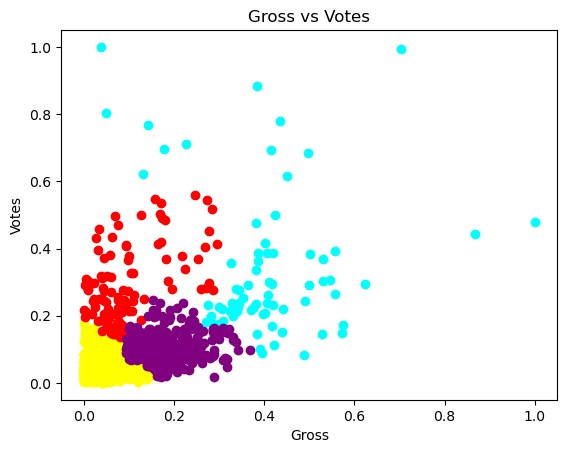

In [67]:
plot_hierarchical_clustering(df, ['Gross', 'Votes'])

#There is a positive correlation between the gross earnings of movies and the number of votes they received.
#Movies with higher gross earnings tend to have a higher number of votes.
#Popular movies that generate more revenue also attract a larger audience who vote for them.

### IMDB Rating and Votes

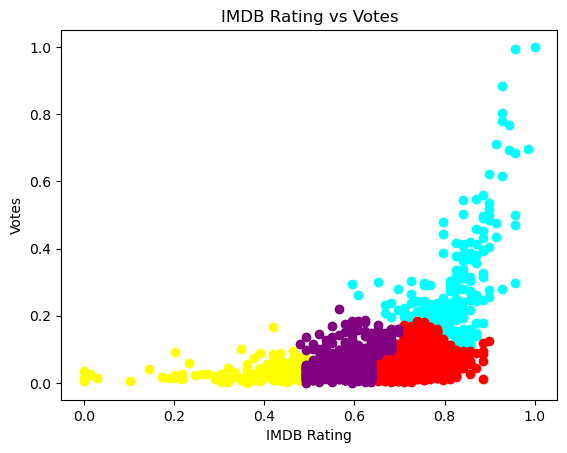

In [68]:
plot_hierarchical_clustering(df, ['IMDB Rating', 'Votes'])

#It indicates a positive correlation between IMDB ratings and the number of votes received.
#Movies with higher IMDB ratings tend to attract more votes.
#Viewers are more likely to vote for movies that have higher IMDB ratings.

<h1><mark>2) K-Medoids Clustering</mark></h1>

In [69]:
# List all movie names in a variable called labels
labels = list(df['Movie Name'])

In [70]:
# StandardScaler function to standarize data to make them consistent
scale = StandardScaler()

<h2>1. Clustering based on IMDB Rating & Gross</h2>

In [71]:
# We will take 2 columns to perform k-medoids clustring on them
imdbr_gross = df.loc[:, ['IMDB Rating', 'Gross']]

# As we can see from the output below the values is far from each other 
# So we will scale them to apply K_Medoids 
imdbr_gross.head()

IMDB Rating   Gross
0          9.2  134.97
1          9.0   57.30
2          7.7   54.80
3          8.3   44.82
5          7.6  132.09

In [72]:
scaled_imdbr_gross = scale.fit_transform(imdbr_gross)

# Here is the data after standarization
scaled_imdbr_gross

array([[ 2.50734377,  0.92922658],
       [ 2.28762293, -0.13348634],
       [ 0.85943748, -0.16769237],
       ...,
       [-0.45888756, -0.4617274 ],
       [-0.56874798, -0.70842128],
       [-1.00818966, -0.48389291]])

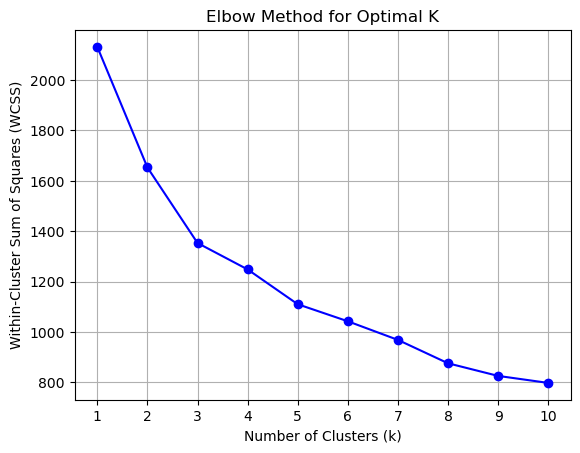

In [73]:
wcss = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=0)
    kmedoids.fit(scaled_imdbr_gross)
    wcss.append(kmedoids.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

# This method determines what is the optimal number of clusters in our data set 
# The best number of clusters located at the Elbow point (which in our case is 3)

In [74]:
# Perform k_Medoids on our scaled data ['IMDB Rating', 'Gross'] columns
# n_clusters parameter is 3 as we choose above
imdbr_gorss_km = KMedoids(n_clusters=3).fit(scaled_imdbr_gross)

# Create an array with clusters labels (the cluster that the data point belong to)
imdbr_gorss_km_labels = imdbr_gorss_km.labels_
print("The cluster labels are:\n", imdbr_gorss_km_labels, '\n')

# Determine the medoids  
imdbr_gorss_medoids = imdbr_gorss_km.cluster_centers_
print("The medoids are:\n", imdbr_gorss_medoids)

The cluster labels are:
 [2 0 0 ... 1 1 1] 

The medoids are:
 [[ 0.63971664 -0.50646888]
 [-0.78846882 -0.314231  ]
 [ 0.20027496  1.06372469]]


In [75]:
kmedoids_silhouette_score = silhouette_score(scaled_imdbr_gross, imdbr_gorss_km_labels)
print("K-Medoids Silhouette Score:", kmedoids_silhouette_score)

K-Medoids Silhouette Score: 0.4009900122179122


In [76]:
df['imdbr_gross_clusters'] = imdbr_gorss_km_labels
df
# Here we add a new column named 'imdbr_gorss_clusters' which indicate the cluster of each row in our data set

Movie Name  Release Year  Duration  IMDB Rating  \
0                          The Godfather          1972       175          9.2   
1                  The Godfather Part II          1974       202          9.0   
2                        Ordinary People          1980       124          7.7   
3                     Lawrence of Arabia          1962       218          8.3   
5     Close Encounters of the Third Kind          1977       138          7.6   
...                                  ...           ...       ...          ...   
1995                  The Young Victoria          2009       105          7.2   
1996                         Tooth Fairy          2010       101          5.0   
1997                      The Informant!          2009       108          6.5   
1998                     Youth in Revolt          2009        90          6.4   
1999                          Quarantine          2008        89          6.0   

      Metascore      Votes                        Genre              Director  \
0         100.0  2002655.0                 Crime, Drama  Francis Ford Coppola   
1          90.0  1358608.0                 Crime, Drama  Francis Ford Coppola   
2          86.0    56476.0                        Drama        Robert Redford   
3         100.0   313044.0  Adventure, Biography, Drama            David Lean   
5          90.0   216050.0                Drama, Sci-Fi      Steven Spielberg   
...         ...        ...                          ...                   ...   
1995       64.0    66235.0    Biography, Drama, History      Jean-Marc Vallée   
1996       36.0    49527.0      Comedy, Family, Fantasy       Michael Lembeck   
1997       66.0    67318.0     Biography, Comedy, Crime     Steven Soderbergh   
1998       63.0    75956.0       Comedy, Drama, Romance         Miguel Arteta   
1999       53.0    77075.0     Horror, Sci-Fi, Thriller     John Erick Dowdle   

                    Cast   Gross  Clusters  imdbr_gross_clusters  
0          Marlon Brando  134.97         1                     2  
1              Al Pacino   57.30         1                     0  
2      Donald Sutherland   54.80         1                     0  
3          Peter O'Toole   44.82         1                     0  
5       Richard Dreyfuss  132.09         1                     2  
...                  ...     ...       ...                   ...  
1995         Emily Blunt   11.00         1                     0  
1996      Dwayne Johnson   60.02         1                     1  
1997          Matt Damon   33.31         1                     1  
1998        Michael Cera   15.28         1                     1  
1999  Jennifer Carpenter   31.69         1                     1  

[1870 rows x 12 columns]

In [77]:
df_sorted_gross = new_df.sort_values(by = ['IMDB Rating', 'Gross'], ascending=False)

In [78]:
# This bar plot represent cluster 0 sorted by IMDB Rating first then gross (Priority to IMDB Rating)
# From the graph we can conclude that films with a high rating not necessarily have a high gross
fig = px.bar(df_sorted_gross.loc[df['imdbr_gross_clusters'] == 0].head(60), x = 'Movie Name', y = 'Gross', color = 'Movie Name', hover_data={'IMDB Rating': True})
fig.update_layout(xaxis_title=None, yaxis_title='Gross Earnings', width=1100, height=850)
fig.show()

In [79]:
# Cluster 1 plot
# These films have low rating and low gross (not attractive to audiences) 
fig = px.bar(df_sorted_gross.loc[df['imdbr_gross_clusters'] == 1].head(60), x = 'Movie Name', y = 'Gross', color = 'Movie Name', hover_data={'IMDB Rating': True})
fig.update_layout(xaxis_title=None, yaxis_title='Gross Earnings', width=1100, height=850)
fig.show() 

In [80]:
# Cluster 2 plot
# These films have high rating and high gross (masterpiece movies) 
fig = px.bar(df_sorted_gross.loc[df['imdbr_gross_clusters'] == 2].head(60), x = 'Movie Name', y = 'Gross', color = 'Movie Name', hover_data={'IMDB Rating': True})
fig.update_layout(xaxis_title=None, yaxis_title='Gross Earnings', width=1100, height=850)
fig.show() 

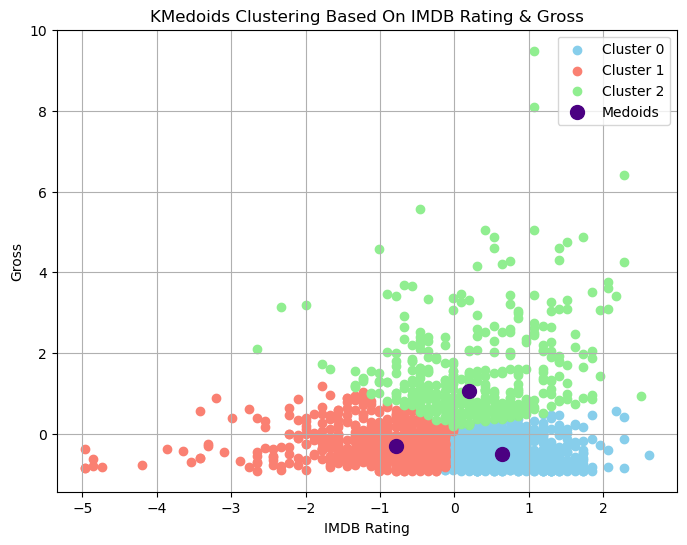

In [81]:
plt.figure(figsize = (8, 6)) 

# We will use scatter plot to visualize our scaled_imdbr_gross data frame

# Plot Cluster 0
plt.scatter(x = scaled_imdbr_gross[df['imdbr_gross_clusters'] == 0, 0], y = scaled_imdbr_gross[df['imdbr_gross_clusters'] == 0, 1], c='skyblue', label='Cluster 0')

# Plot Cluster 1
plt.scatter(x = scaled_imdbr_gross[df['imdbr_gross_clusters'] == 1,0], y = scaled_imdbr_gross[df['imdbr_gross_clusters'] == 1, 1], c='salmon', label='Cluster 1')

# Plot Cluster 2
plt.scatter(x = scaled_imdbr_gross[df['imdbr_gross_clusters'] == 2,0], y = scaled_imdbr_gross[df['imdbr_gross_clusters'] == 2,1], c='lightgreen', label='Cluster 2')


# Place our medoids in the graph with a different color than the clusters to distinguish them
plt.scatter(imdbr_gorss_medoids[:, 0], imdbr_gorss_medoids[:, 1], marker='o', c='indigo', s=100, label='Medoids')

plt.title('KMedoids Clustering Based On IMDB Rating & Gross')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross')

# Legend function to more information about the graph
plt.legend()

plt.grid()
plt.show()

# From the following graph we can conclude that :- 
# The cluster in the upper right corner could represent high-grossing, high-rated movies. These might be blockbuster films that are both critically acclaimed and popular with audiences.
# The cluster in the lower left corner could represent low-grossing, low-rated movies. These might be independent films or art house films that have not found a wide audience.
# The other clusters could represent movies that fall somewhere in between, in terms of both gross and rating.

In [82]:
# low 'Gross' High 'Rating' (Cluster 0)
print('Number of movies cluster 0: ', df.loc[df['imdbr_gross_clusters'] == 0].shape[0])
print('cluster 0 median gross : ', df.loc[df['imdbr_gross_clusters'] == 0]['Gross'].median())
print('cluster 0 median rating : ', df.loc[df['imdbr_gross_clusters'] == 0]['IMDB Rating'].median())


print('#-------------\n')


# low 'Gross' low 'Rating' (Cluster 1)
print('Number of movies cluster 1: ', df.loc[df['imdbr_gross_clusters'] == 1].shape[0])
print('cluster 1 median gross : ', df.loc[df['imdbr_gross_clusters'] == 1]['Gross'].median())
print('cluster 1 median rating : ', df.loc[df['imdbr_gross_clusters'] == 1]['IMDB Rating'].median())

print('#-------------\n')

# high 'Gross' high 'Rating' (Cluster 2)
print('Number of movies cluster 2: ', df.loc[df['imdbr_gross_clusters'] == 2].shape[0])
print('cluster 2 median gross : ', df.loc[df['imdbr_gross_clusters'] == 2]['Gross'].median())
print('cluster 2 median rating : ', df.loc[df['imdbr_gross_clusters'] == 2]['IMDB Rating'].median())

Number of movies cluster 0:  794
cluster 0 median gross :  25.955
cluster 0 median rating :  7.5
#-------------

Number of movies cluster 1:  686
cluster 1 median gross :  41.86
cluster 1 median rating :  6.2
#-------------

Number of movies cluster 2:  390
cluster 2 median gross :  146.035
cluster 2 median rating :  7.1


<h2>2. Clustering based on IMDB Rating & Duration</h2>

In [83]:
imdbr_duration = df.loc[:, ['IMDB Rating', 'Duration']]

# Like the point 1 we will perform scaling here for the same reason
imdbr_duration.head()

IMDB Rating  Duration
0          9.2       175
1          9.0       202
2          7.7       124
3          8.3       218
5          7.6       138

In [84]:
scaled_imdbr_duration = scale.fit_transform(imdbr_duration)

# The data after standarization
scaled_imdbr_duration

array([[ 2.50734377,  2.75843486],
       [ 2.28762293,  3.97982044],
       [ 0.85943748,  0.45137321],
       ...,
       [-0.45888756, -0.27241083],
       [-0.56874798, -1.08666789],
       [-1.00818966, -1.13190439]])

D:\FCDS3\conda\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning:

Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).

D:\FCDS3\conda\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning:

Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).

D:\FCDS3\conda\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning:

Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).

D:\FCDS3\conda\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning:

Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).

D:\FCDS3\conda\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning:

Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding clus

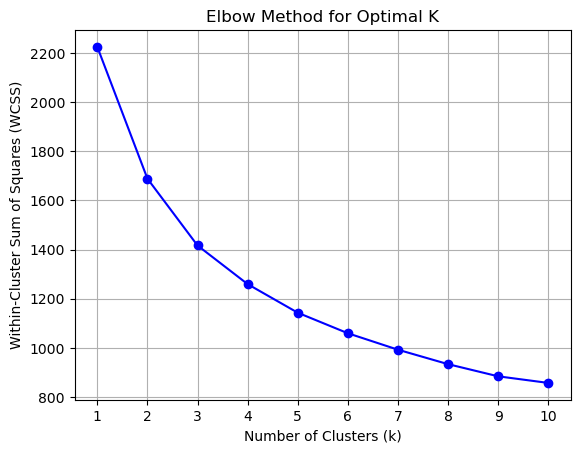

In [85]:
wcss = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=0)
    kmedoids.fit(scaled_imdbr_duration)
    wcss.append(kmedoids.inertia_)
# Plot the elbow curve

plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

# As we can see there is no Elbow point because the duration, gross relation can not clustring the data well
# So we will choose 3 as a random number of clusters

In [86]:
# Perform k_Medoids on our scaled data ['IMDB Rating', 'Duration'] columns
imdbr_duration_km = KMedoids(n_clusters=3).fit(scaled_imdbr_duration) 

imdbr_duration_km_labels =imdbr_duration_km.labels_
print("The cluster labels are:\n", imdbr_duration_km_labels, '\n')

imdbr_duration_medoids = imdbr_duration_km.cluster_centers_
print("The medoids are:\n", imdbr_duration_medoids)

The cluster labels are:
 [1 1 1 ... 0 0 0] 

The medoids are:
 [[-0.89832924 -0.45335685]
 [ 0.63971664  0.85850174]
 [ 0.4199958  -0.54382985]]


In [87]:
kmedoids_silhouette_score2 = silhouette_score(scaled_imdbr_duration, imdbr_duration_km_labels)
print("K-Medoids Silhouette Score:", kmedoids_silhouette_score2)

K-Medoids Silhouette Score: 0.33636011811703587


In [88]:
df['imdbr_duration_clusters'] = imdbr_duration_km_labels
df

Movie Name  Release Year  Duration  IMDB Rating  \
0                          The Godfather          1972       175          9.2   
1                  The Godfather Part II          1974       202          9.0   
2                        Ordinary People          1980       124          7.7   
3                     Lawrence of Arabia          1962       218          8.3   
5     Close Encounters of the Third Kind          1977       138          7.6   
...                                  ...           ...       ...          ...   
1995                  The Young Victoria          2009       105          7.2   
1996                         Tooth Fairy          2010       101          5.0   
1997                      The Informant!          2009       108          6.5   
1998                     Youth in Revolt          2009        90          6.4   
1999                          Quarantine          2008        89          6.0   

      Metascore      Votes                        Genre              Director  \
0         100.0  2002655.0                 Crime, Drama  Francis Ford Coppola   
1          90.0  1358608.0                 Crime, Drama  Francis Ford Coppola   
2          86.0    56476.0                        Drama        Robert Redford   
3         100.0   313044.0  Adventure, Biography, Drama            David Lean   
5          90.0   216050.0                Drama, Sci-Fi      Steven Spielberg   
...         ...        ...                          ...                   ...   
1995       64.0    66235.0    Biography, Drama, History      Jean-Marc Vallée   
1996       36.0    49527.0      Comedy, Family, Fantasy       Michael Lembeck   
1997       66.0    67318.0     Biography, Comedy, Crime     Steven Soderbergh   
1998       63.0    75956.0       Comedy, Drama, Romance         Miguel Arteta   
1999       53.0    77075.0     Horror, Sci-Fi, Thriller     John Erick Dowdle   

                    Cast   Gross  Clusters  imdbr_gross_clusters  \
0          Marlon Brando  134.97         1                     2   
1              Al Pacino   57.30         1                     0   
2      Donald Sutherland   54.80         1                     0   
3          Peter O'Toole   44.82         1                     0   
5       Richard Dreyfuss  132.09         1                     2   
...                  ...     ...       ...                   ...   
1995         Emily Blunt   11.00         1                     0   
1996      Dwayne Johnson   60.02         1                     1   
1997          Matt Damon   33.31         1                     1   
1998        Michael Cera   15.28         1                     1   
1999  Jennifer Carpenter   31.69         1                     1   

      imdbr_duration_clusters  
0                           1  
1                           1  
2                           1  
3                           1  
5                           1  
...                       ...  
1995                        2  
1996                        0  
1997                        0  
1998                        0  
1999                        0  

[1870 rows x 13 columns]

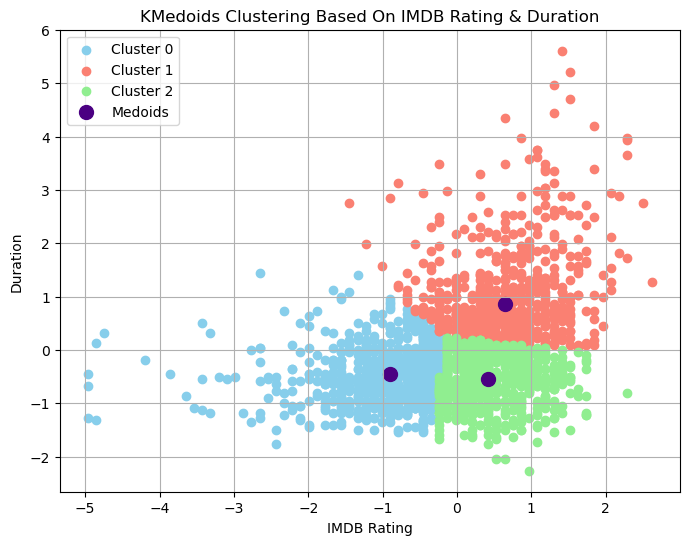

In [89]:
plt.figure(figsize=(8, 6))

# Plot Cluster 0
plt.scatter(x = scaled_imdbr_duration[df['imdbr_duration_clusters'] == 0, 0], y = scaled_imdbr_duration[df['imdbr_duration_clusters'] == 0, 1], c='skyblue', label='Cluster 0')

# Plot Cluster 1
plt.scatter(x = scaled_imdbr_duration[df['imdbr_duration_clusters'] == 1,0], y = scaled_imdbr_duration[df['imdbr_duration_clusters'] == 1, 1], c='salmon', label='Cluster 1')

# Plot Cluster 2
plt.scatter(x = scaled_imdbr_duration[df['imdbr_duration_clusters'] == 2,0], y = scaled_imdbr_duration[df['imdbr_duration_clusters'] == 2,1], c='lightgreen', label='Cluster 2')


# Place our medoids in the graph with a different color than the clusters to distinguish them
plt.scatter(imdbr_duration_medoids[:, 0], imdbr_duration_medoids[:, 1], marker='o', c='indigo', s=100, label='Medoids')

plt.title('KMedoids Clustering Based On IMDB Rating & Duration')
plt.xlabel('IMDB Rating')
plt.ylabel('Duration')

# Legend function to more information about the graph
plt.legend()

plt.grid()
plt.show()

# From the following graph we can conclude that :- 
# The movies in the upper right cluster tend to have high IMDB ratings and long durations. These movies might be epics, dramas, or documentaries
# The movies in the lower left cluster tend to have low IMDB ratings and short durations. These movies might be comedies, horror films, or action films
# There are a few movies that are outliers, meaning that they do not fit neatly into any of the clusters. These movies might be cult classics or films that defy genre classification

In [91]:
print('Number of movies cluster 0: ', df.loc[df['imdbr_duration_clusters'] == 0].shape[0])
print('cluster 0 median Duration : ', df.loc[df['imdbr_duration_clusters'] == 0]['Duration'].median())
print('cluster 0 median rating : ', df.loc[df['imdbr_duration_clusters'] == 0]['IMDB Rating'].median())

print('#-------------\n')

print('Number of movies cluster 1: ', df.loc[df['imdbr_duration_clusters'] == 1].shape[0])
print('cluster 1 median gross : ', df.loc[df['imdbr_duration_clusters'] == 1]['Duration'].median())
print('cluster 1 median rating : ', df.loc[df['imdbr_duration_clusters'] == 1]['IMDB Rating'].median())

print('#-------------\n')

print('Number of movies cluster 2: ', df.loc[df['imdbr_duration_clusters'] == 2].shape[0])
print('cluster 2 median gross : ', df.loc[df['imdbr_duration_clusters'] == 2]['Duration'].median())
print('cluster 2 median rating : ', df.loc[df['imdbr_duration_clusters'] == 2]['IMDB Rating'].median())

# We can not well defined the proberties of each cluster

Number of movies cluster 0:  659
cluster 0 median Duration :  104.0
cluster 0 median rating :  6.2
#-------------

Number of movies cluster 1:  591
cluster 1 median gross :  132.0
cluster 1 median rating :  7.5
#-------------

Number of movies cluster 2:  620
cluster 2 median gross :  102.0
cluster 2 median rating :  7.3


<h2>3. Check popularity and Gross </h2>

In [92]:
# Create a data frame named gross_votes has only ['Gross', 'Votes'] columns
gross_votes = df[['Gross', 'Votes']]
gross_votes.head()

Gross      Votes
0  134.97  2002655.0
1   57.30  1358608.0
2   54.80    56476.0
3   44.82   313044.0
5  132.09   216050.0

In [93]:
scaled_gross_votes = scale.fit_transform(gross_votes)

# The data after standarization
scaled_gross_votes

array([[ 0.92922658,  6.25029489],
       [-0.13348634,  3.97621857],
       [-0.16769237, -0.62150109],
       ...,
       [-0.4617274 , -0.58321889],
       [-0.70842128, -0.55271883],
       [-0.48389291, -0.54876773]])

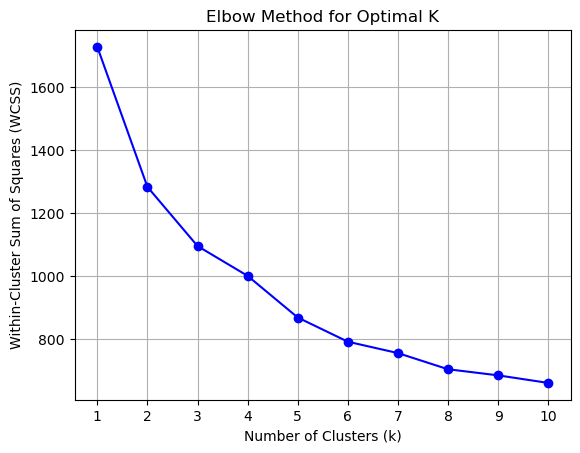

In [94]:
wcss = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=0)
    kmedoids.fit(scaled_gross_votes)
    wcss.append(kmedoids.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

# The Elbow point is 3 as we see in the graph below

In [95]:
# Perform k_Medoids on our scaled data ['Gross', 'Votes'] columns

gross_votes_km = KMedoids(n_clusters=3).fit(scaled_gross_votes)

gross_votes_km_labels = gross_votes_km.labels_
print("The cluster labels are:\n", gross_votes_km_labels, '\n')

gross_votes_medoids = gross_votes_km.cluster_centers_
print("The medoids are:\n", gross_votes_medoids)

The cluster labels are:
 [0 0 1 ... 1 1 1] 

The medoids are:
 [[ 1.63209207  1.08276649]
 [-0.63426261 -0.46581238]
 [ 0.16013822 -0.17155637]]


In [96]:
kmedoids_silhouette_score3 = silhouette_score(scaled_gross_votes, gross_votes_km_labels)
print("K-Medoids Silhouette Score:", kmedoids_silhouette_score3)

K-Medoids Silhouette Score: 0.3787232189550813


In [97]:
df['gross_votes_clusters'] = gross_votes_km_labels
df

Movie Name  Release Year  Duration  IMDB Rating  \
0                          The Godfather          1972       175          9.2   
1                  The Godfather Part II          1974       202          9.0   
2                        Ordinary People          1980       124          7.7   
3                     Lawrence of Arabia          1962       218          8.3   
5     Close Encounters of the Third Kind          1977       138          7.6   
...                                  ...           ...       ...          ...   
1995                  The Young Victoria          2009       105          7.2   
1996                         Tooth Fairy          2010       101          5.0   
1997                      The Informant!          2009       108          6.5   
1998                     Youth in Revolt          2009        90          6.4   
1999                          Quarantine          2008        89          6.0   

      Metascore      Votes                        Genre              Director  \
0         100.0  2002655.0                 Crime, Drama  Francis Ford Coppola   
1          90.0  1358608.0                 Crime, Drama  Francis Ford Coppola   
2          86.0    56476.0                        Drama        Robert Redford   
3         100.0   313044.0  Adventure, Biography, Drama            David Lean   
5          90.0   216050.0                Drama, Sci-Fi      Steven Spielberg   
...         ...        ...                          ...                   ...   
1995       64.0    66235.0    Biography, Drama, History      Jean-Marc Vallée   
1996       36.0    49527.0      Comedy, Family, Fantasy       Michael Lembeck   
1997       66.0    67318.0     Biography, Comedy, Crime     Steven Soderbergh   
1998       63.0    75956.0       Comedy, Drama, Romance         Miguel Arteta   
1999       53.0    77075.0     Horror, Sci-Fi, Thriller     John Erick Dowdle   

                    Cast   Gross  Clusters  imdbr_gross_clusters  \
0          Marlon Brando  134.97         1                     2   
1              Al Pacino   57.30         1                     0   
2      Donald Sutherland   54.80         1                     0   
3          Peter O'Toole   44.82         1                     0   
5       Richard Dreyfuss  132.09         1                     2   
...                  ...     ...       ...                   ...   
1995         Emily Blunt   11.00         1                     0   
1996      Dwayne Johnson   60.02         1                     1   
1997          Matt Damon   33.31         1                     1   
1998        Michael Cera   15.28         1                     1   
1999  Jennifer Carpenter   31.69         1                     1   

      imdbr_duration_clusters  gross_votes_clusters  
0                           1                     0  
1                           1                     0  
2                           1                     1  
3                           1                     2  
5                           1                     2  
...                       ...                   ...  
1995                        2                     1  
1996                        0                     2  
1997                        0                     1  
1998                        0                     1  
1999                        0                     1  

[1870 rows x 14 columns]

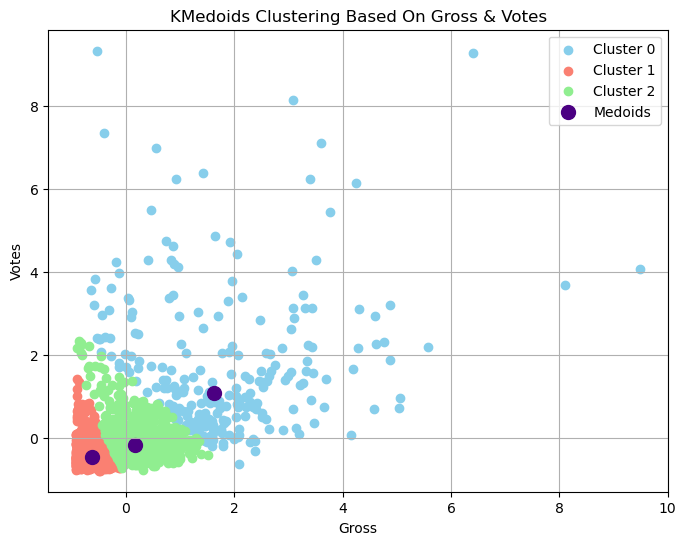

In [98]:
plt.figure(figsize=(8, 6))

# Plot Cluster 0
plt.scatter(x = scaled_gross_votes[df['gross_votes_clusters'] == 0, 0], y = scaled_gross_votes[df['gross_votes_clusters'] == 0, 1], c='skyblue', label='Cluster 0')

# Plot Cluster 1
plt.scatter(x = scaled_gross_votes[df['gross_votes_clusters'] == 1,0], y = scaled_gross_votes[df['gross_votes_clusters'] == 1, 1], c='salmon', label='Cluster 1')

# Plot Cluster 2
plt.scatter(x = scaled_gross_votes[df['gross_votes_clusters'] == 2,0], y = scaled_gross_votes[df['gross_votes_clusters'] == 2, 1], c='lightgreen', label='Cluster 2')

# Place our medoids in the graph with a different color than the clusters to distinguish them
plt.scatter(gross_votes_medoids[:, 0], gross_votes_medoids[:, 1], marker='o', c='indigo', s=100, label='Medoids')

plt.title('KMedoids Clustering Based On Gross & Votes')
plt.xlabel('Gross')
plt.ylabel('Votes')

# Legend function to more information about the graph
plt.legend()

plt.grid()
plt.show()

In [99]:
# high 'Votes' high 'Gross' (cluster 0)
print('Number of movies cluster 0: ', df.loc[df['gross_votes_clusters'] == 0].shape[0])
print('cluster 0 median votes : ', df.loc[df['gross_votes_clusters'] == 0]['Votes'].median())
print('cluster 0 median gross : ', df.loc[df['gross_votes_clusters'] == 0]['Gross'].median())

print('#-------------\n')

# low 'Votes' low 'Gross' (cluster 1)
print('Number of movies cluster 1: ', df.loc[df['gross_votes_clusters'] == 1].shape[0])
print('cluster 1 median votes : ', df.loc[df['gross_votes_clusters'] == 1]['Votes'].median())
print('cluster 1 median gross : ', df.loc[df['gross_votes_clusters'] == 1]['Gross'].median())

print('#-------------\n')

# Cluster 2 represent normal movies that does not have high votes nor high gross
print('Number of movies cluster 2: ', df.loc[df['gross_votes_clusters'] == 2].shape[0])
print('cluster 1 median votes : ', df.loc[df['gross_votes_clusters'] == 2]['Votes'].median())
print('cluster 1 median gross : ', df.loc[df['gross_votes_clusters'] == 2]['Gross'].median())

print('#-------------\n')

# From the information below we can conclude that the 'Gross' is highly related with 'Votes' 

Number of movies cluster 0:  250
cluster 0 median votes :  571804.0
cluster 0 median gross :  182.715
#-------------

Number of movies cluster 1:  953
cluster 1 median votes :  95068.0
cluster 1 median gross :  20.21
#-------------

Number of movies cluster 2:  667
cluster 1 median votes :  181498.0
cluster 1 median gross :  76.57
#-------------



<h2><mark> Hierarchical & KMedoids Comparison </mark></h2>

In [100]:
imdbr_gross_dendo = linkage(scaled_imdbr_gross, method='complete', metric='euclidean')

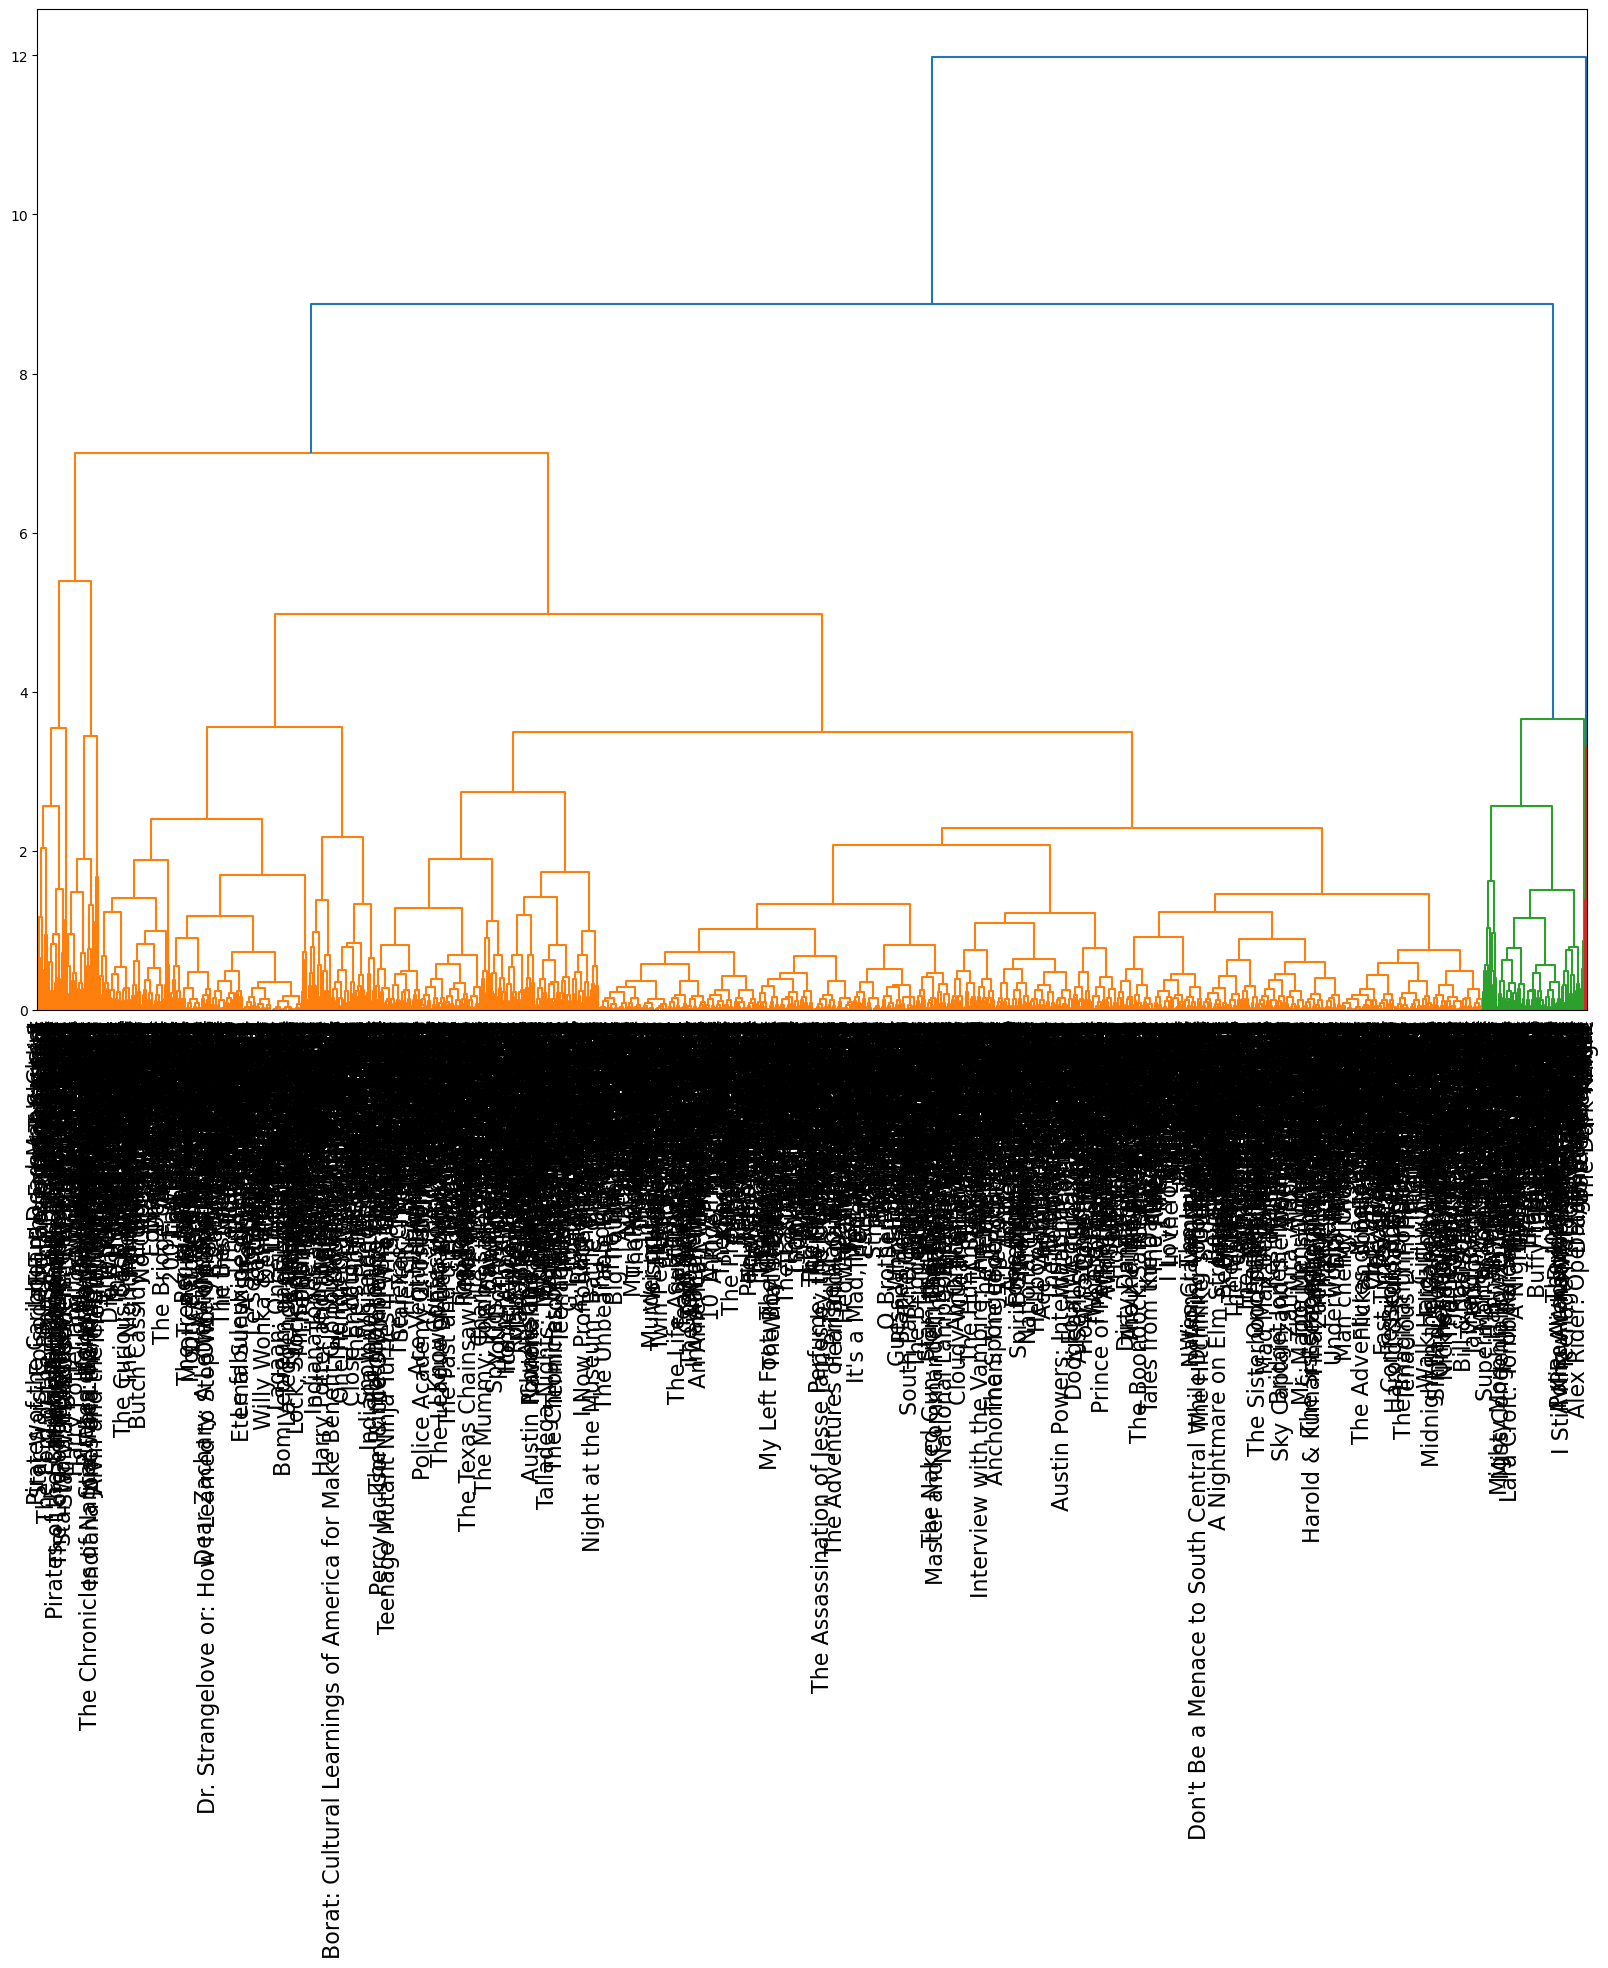

In [101]:
plt.figure(figsize=(20, 13))
dendrogram(
imdbr_gross_dendo,
orientation='top',
labels=labels,
distance_sort='descending',
leaf_font_size=16)
plt.show()

In [102]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')

In [103]:
scaled_imdbr_gross_hc = hc.fit_predict(scaled_imdbr_gross)

In [104]:
scaled_imdbr_gross_hc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Text(0.5, 1.0, 'Hierarchical Clustring Based On IMDB Rating & Gross')

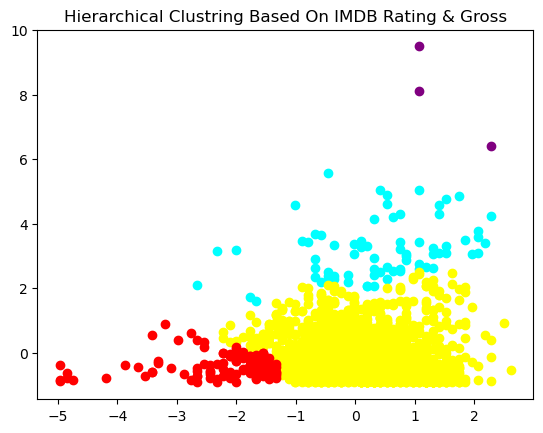

In [105]:
plt.scatter(scaled_imdbr_gross[scaled_imdbr_gross_hc == 0,0],scaled_imdbr_gross[scaled_imdbr_gross_hc ==0,1], c = 'cyan')
plt.scatter(scaled_imdbr_gross[scaled_imdbr_gross_hc == 1,0],scaled_imdbr_gross[scaled_imdbr_gross_hc ==1,1], c= 'yellow')
plt.scatter(scaled_imdbr_gross[scaled_imdbr_gross_hc == 2,0],scaled_imdbr_gross[scaled_imdbr_gross_hc ==2,1], c = 'red')
plt.scatter(scaled_imdbr_gross[scaled_imdbr_gross_hc == 3,0],scaled_imdbr_gross[scaled_imdbr_gross_hc ==3,1], c = 'purple')
plt.title("Hierarchical Clustring Based On IMDB Rating & Gross")

In [106]:
imdbr_duration_dendo = linkage(scaled_imdbr_duration, method='complete', metric='euclidean')

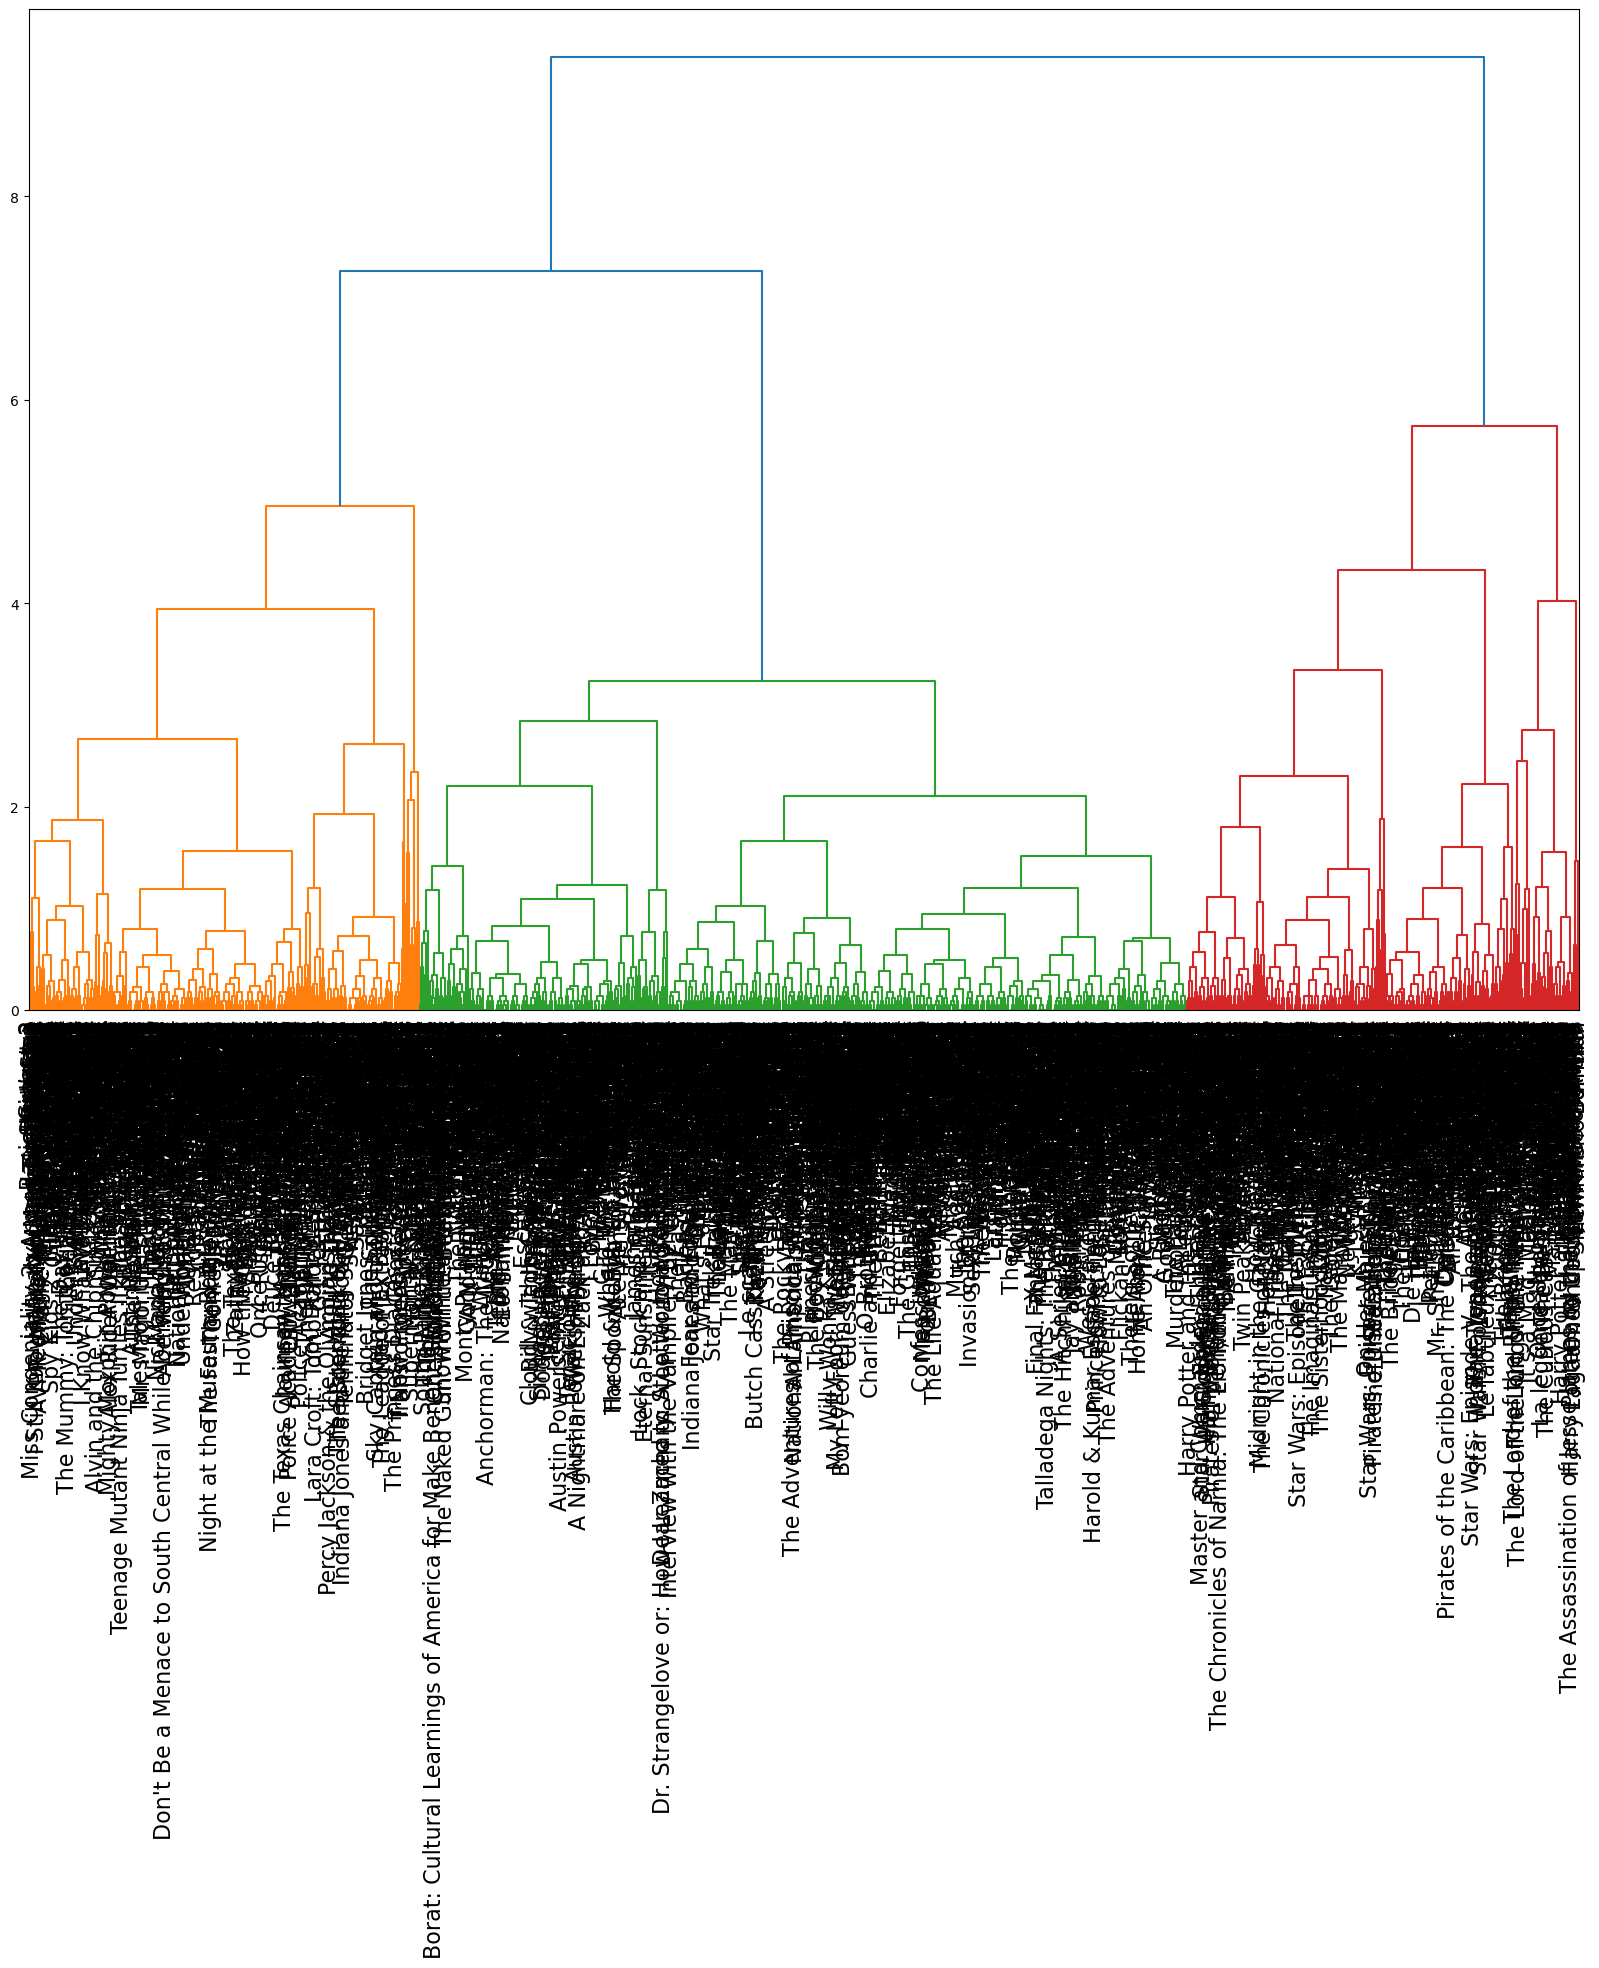

In [107]:
plt.figure(figsize=(20, 13))
dendrogram(
imdbr_duration_dendo,
orientation='top',
labels=labels,
distance_sort='descending',
leaf_font_size=16)
plt.show()

In [108]:
scaled_imdbr_duration_hc = hc.fit_predict(scaled_imdbr_duration)

In [109]:
scaled_imdbr_duration_hc

array([3, 3, 2, ..., 2, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Hierarchical Clustring Based On IMDB Rating & Duration')

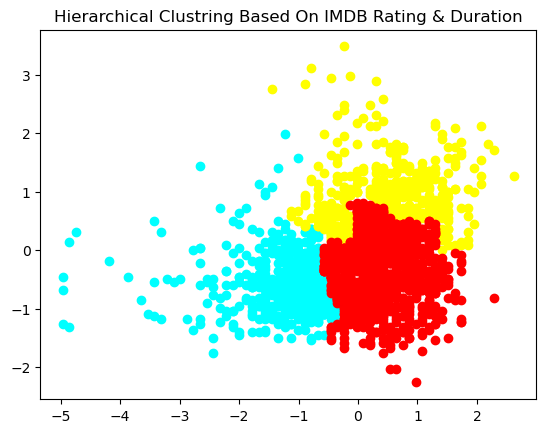

In [110]:
plt.scatter(scaled_imdbr_duration[scaled_imdbr_duration_hc == 0,0],scaled_imdbr_duration[scaled_imdbr_duration_hc ==0,1], c = 'cyan')
plt.scatter(scaled_imdbr_duration[scaled_imdbr_duration_hc == 1,0],scaled_imdbr_duration[scaled_imdbr_duration_hc ==1,1], c= 'yellow')
plt.scatter(scaled_imdbr_duration[scaled_imdbr_duration_hc == 2,0],scaled_imdbr_duration[scaled_imdbr_duration_hc ==2,1], c = 'red')
plt.title("Hierarchical Clustring Based On IMDB Rating & Duration")